# A. INTRODUCTION

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

Keterangan kolom yang boolean 
1. sex : 0 = female, 1 = Yes
2. diabetes: 0 = No, 1 = Yes
3. high_blood_pressure : 0 = No, 1 = Yes
4. anaemia : 0 = No, 1 = Yes
5. smoking : 0 = No, 1 = Yes
6. DEATH_EVENT : 0 = selamat, 1 = meninggal

# B. IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

# C. DATA LOADING

In [2]:
df = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# D. DATA CLEANING 

## Eksplorasi Data Sederhana

In [3]:
# melihat info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# melihat shape dataset
df.shape

(299, 13)

In [5]:
#  melihat describe dari dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


dilihat dari describe data diatas penyebaran standard deviasi nya kurang merata, begitu juga dengan mean yang ada tidak seimbang. Mungkin perlu dilakukan normalisasi

## Melihat Duplicated Data dan Missing Values 

In [6]:
# melihat Duplicate data
df.duplicated().sum()

0

In [7]:
#  melihat missing values di data 

df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Melihat Outliers dan Mengatasinya

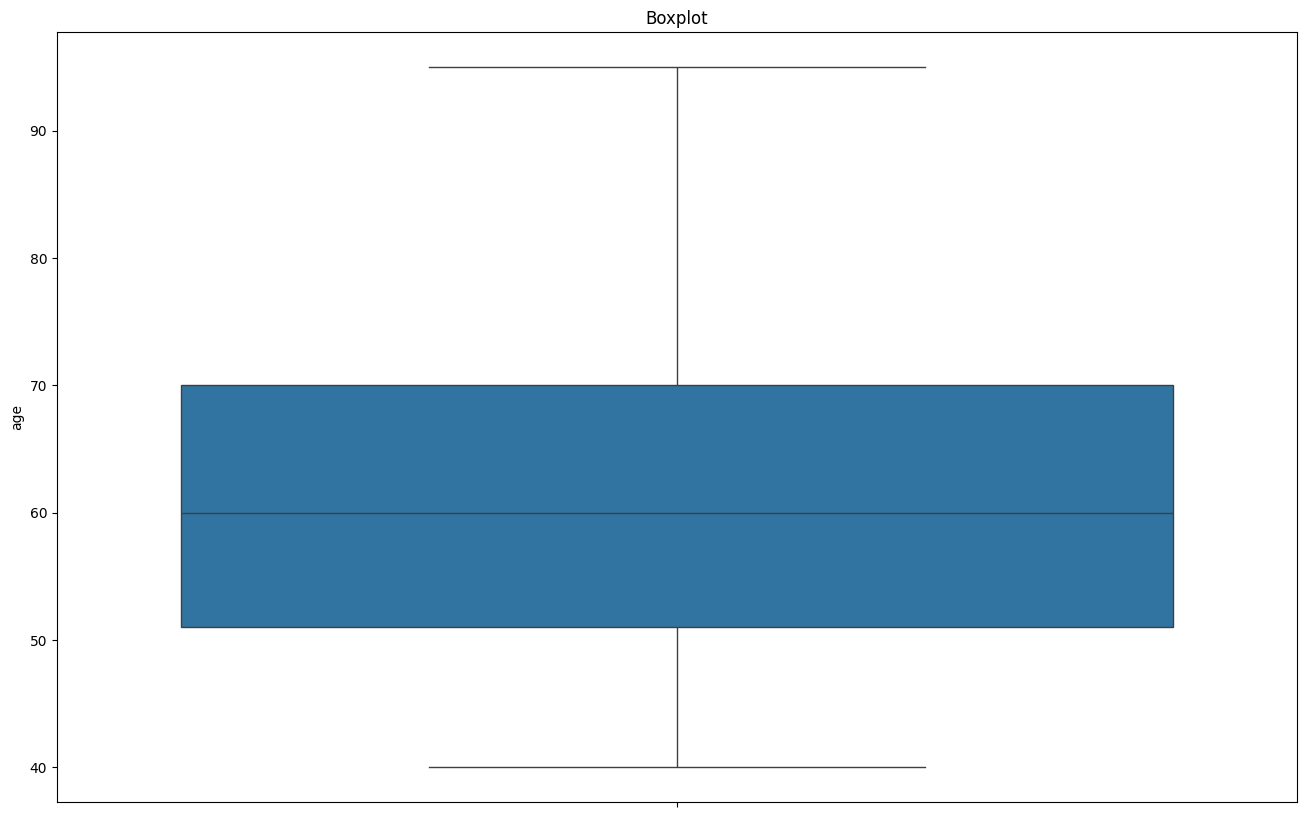

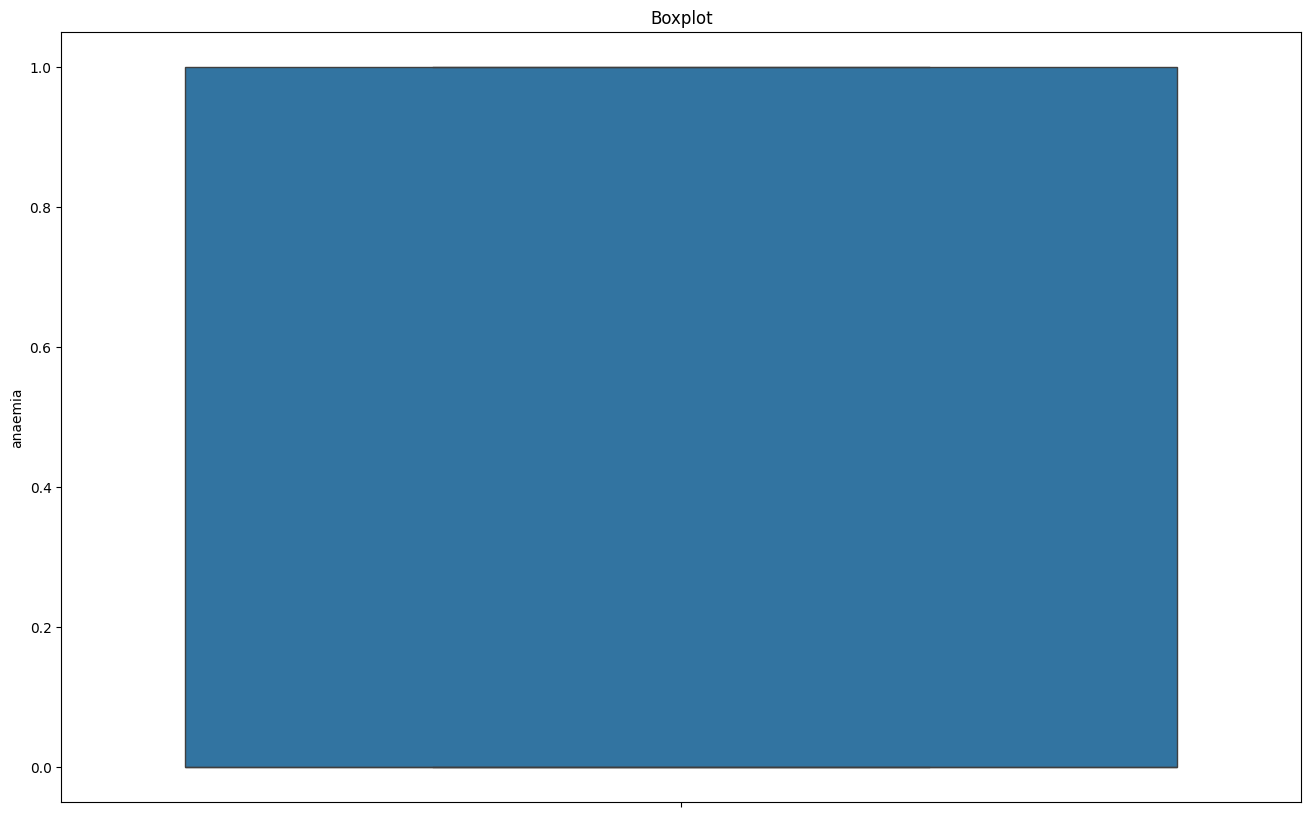

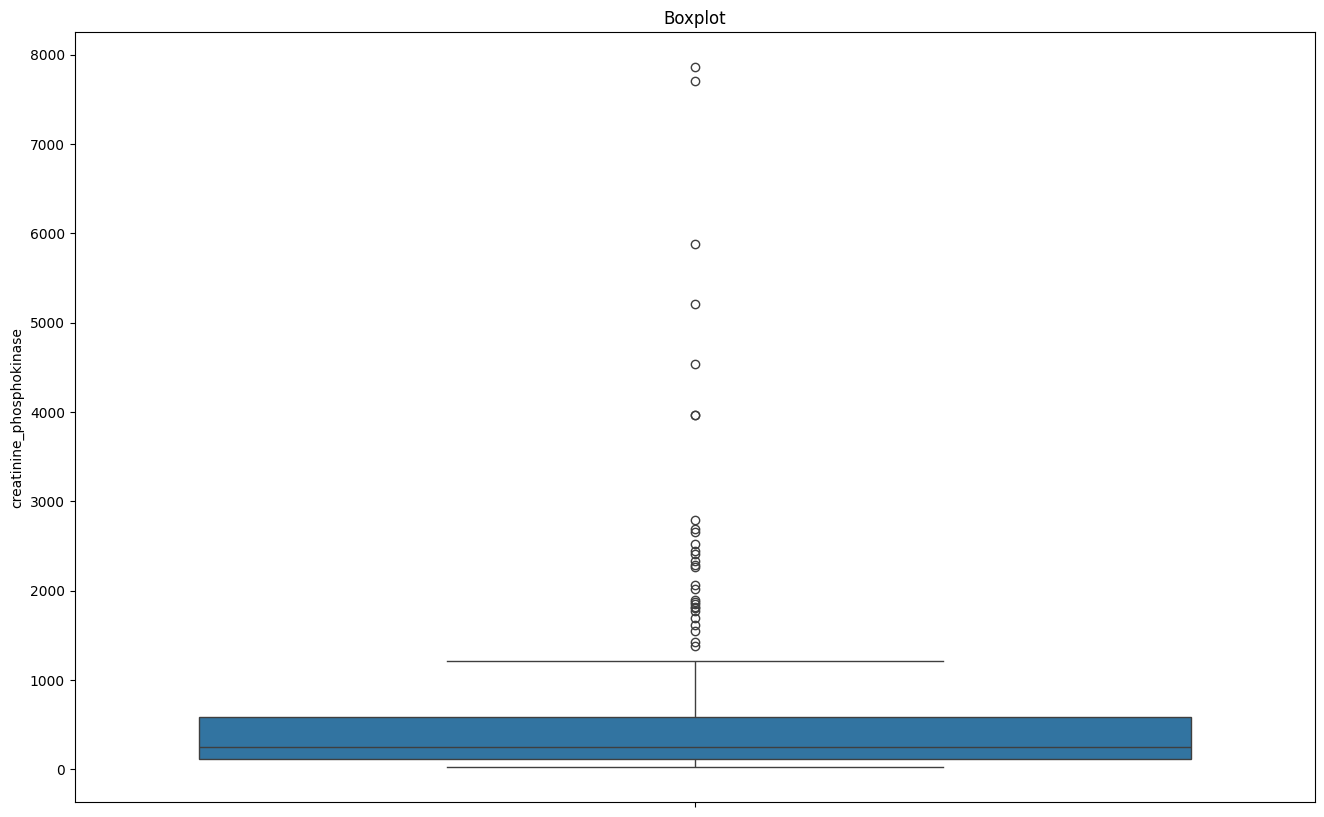

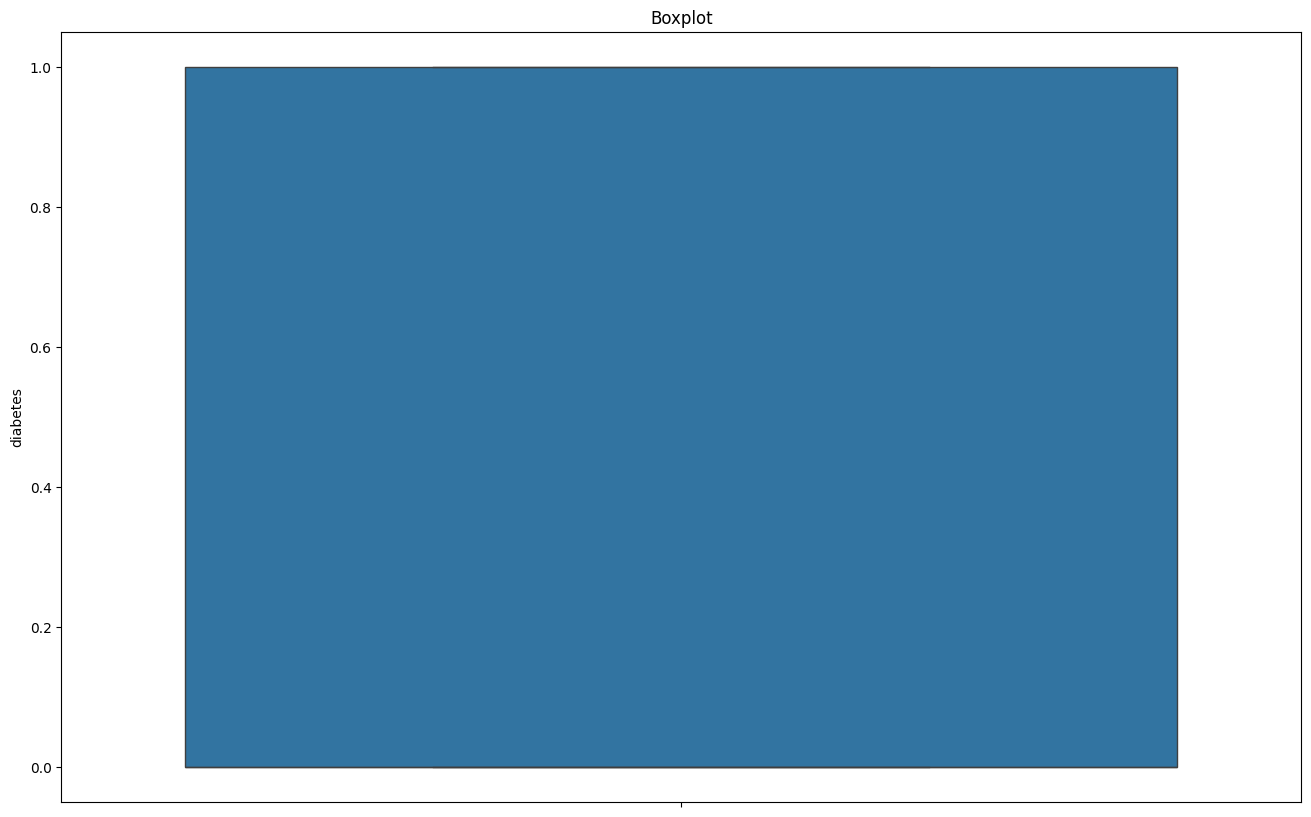

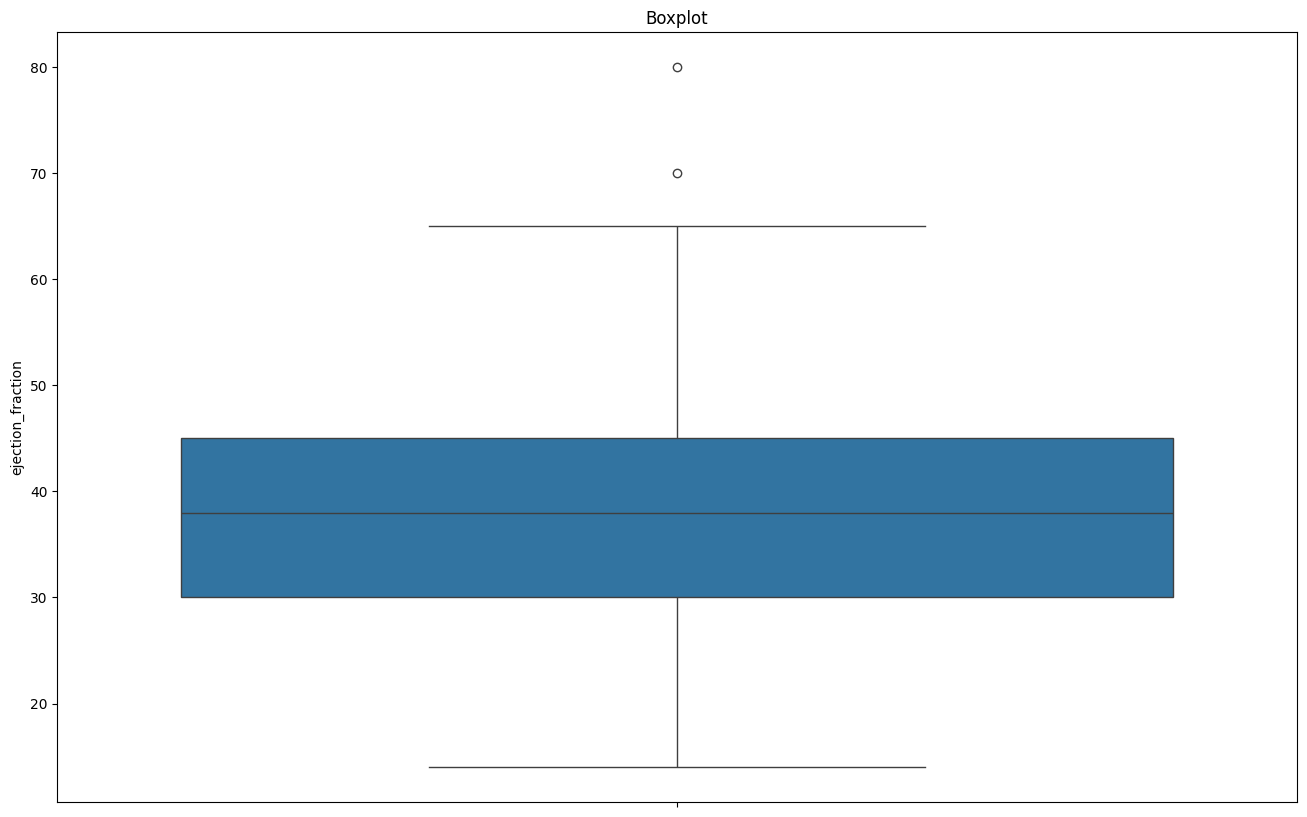

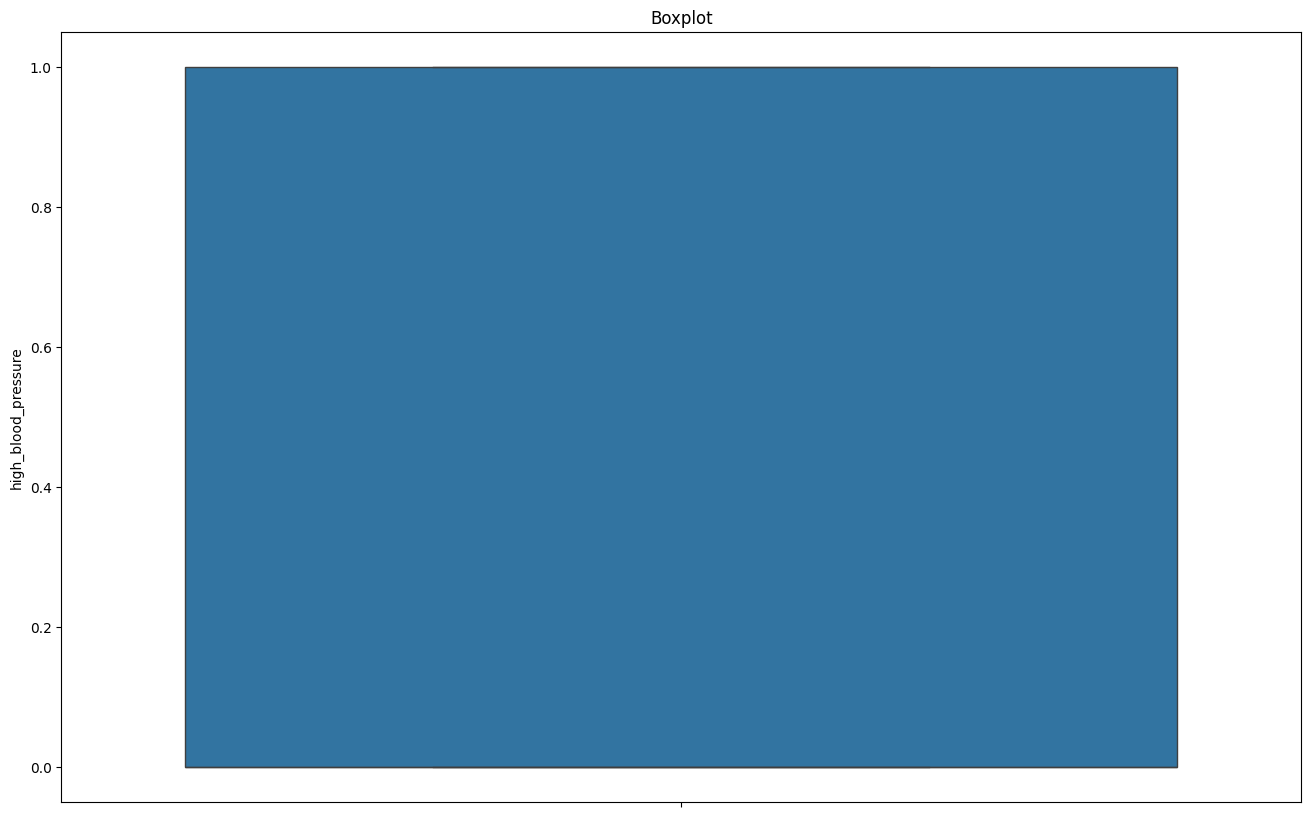

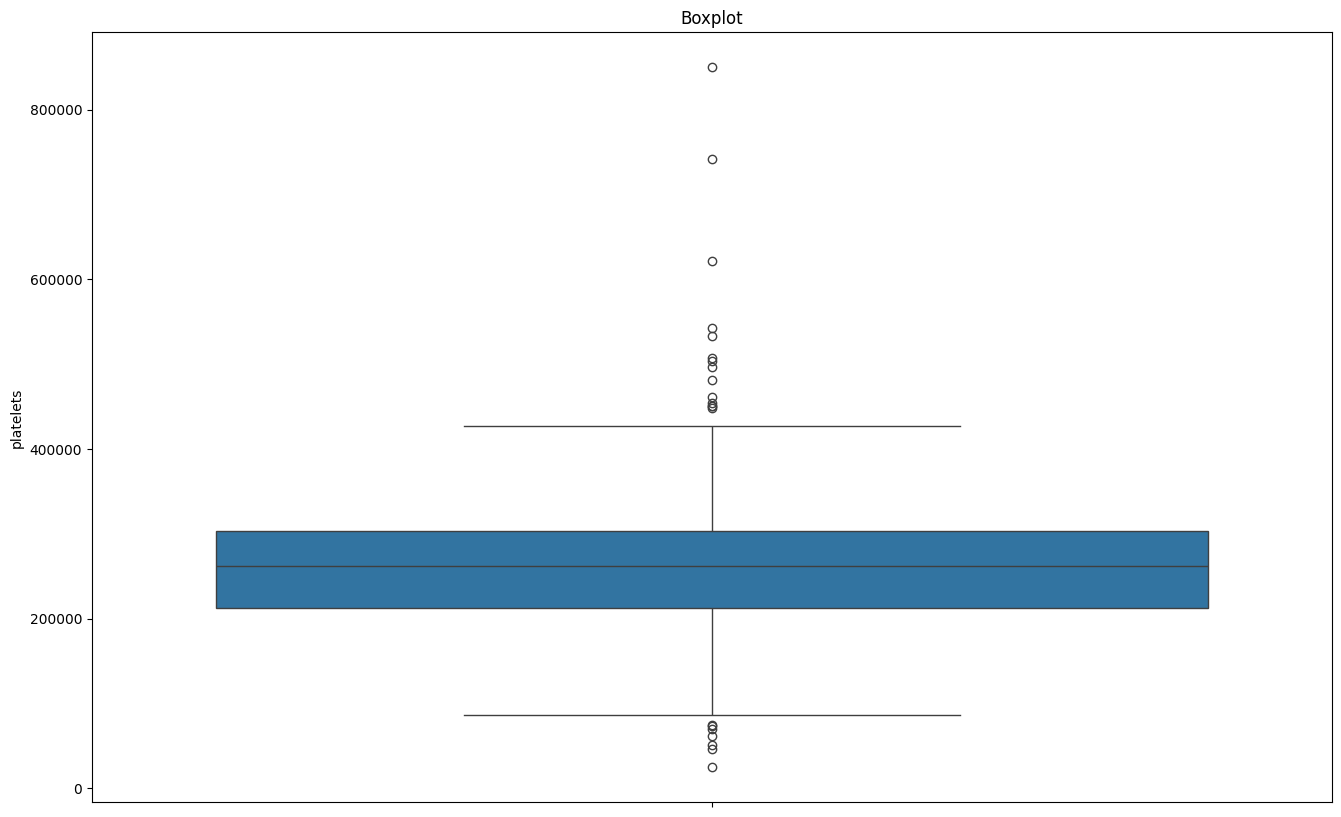

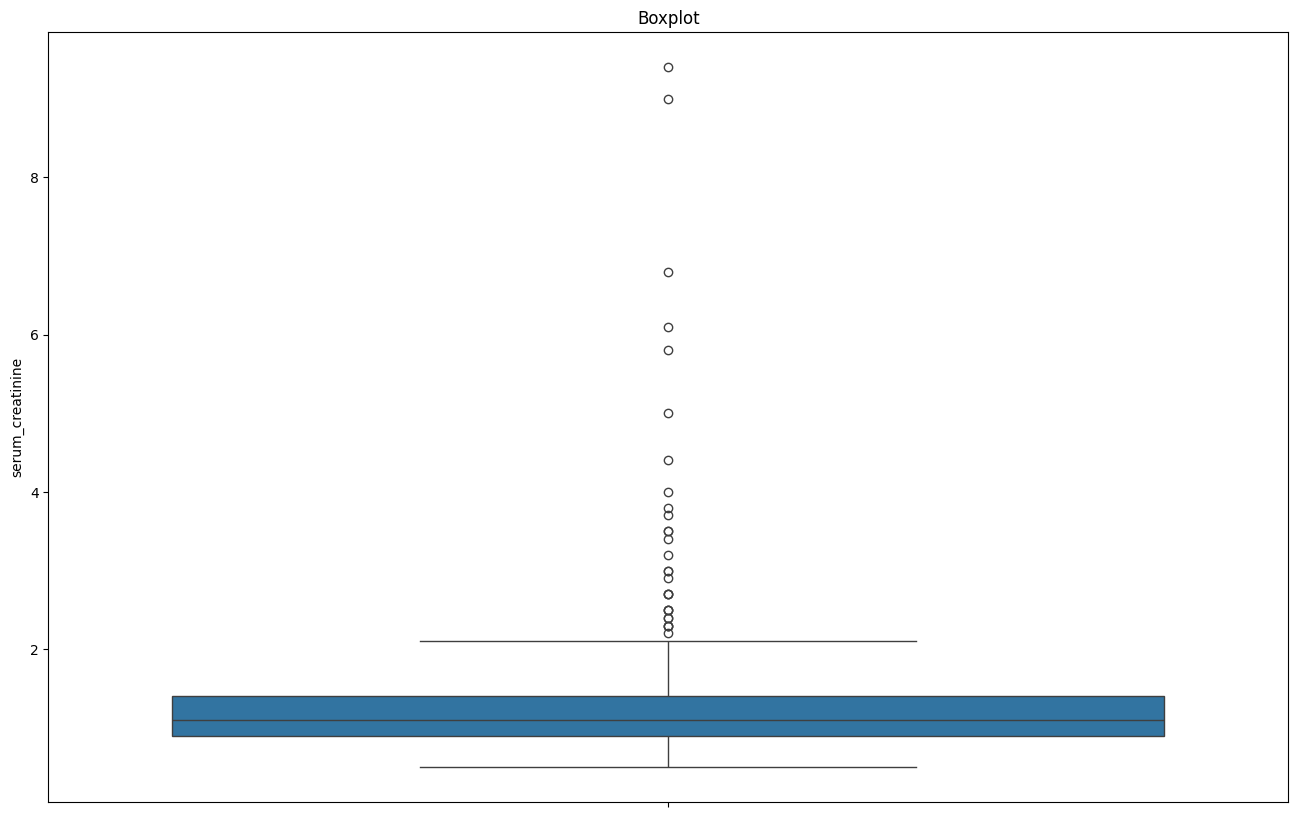

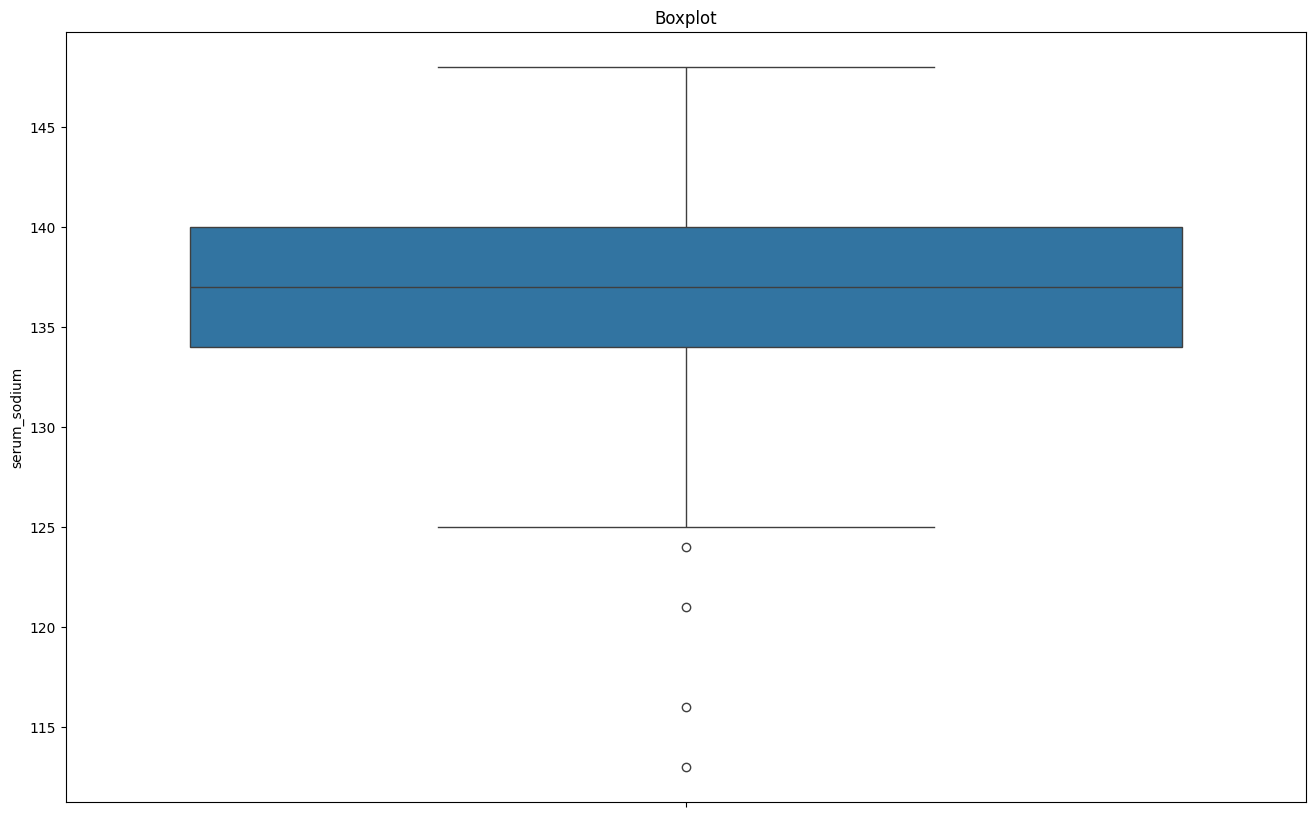

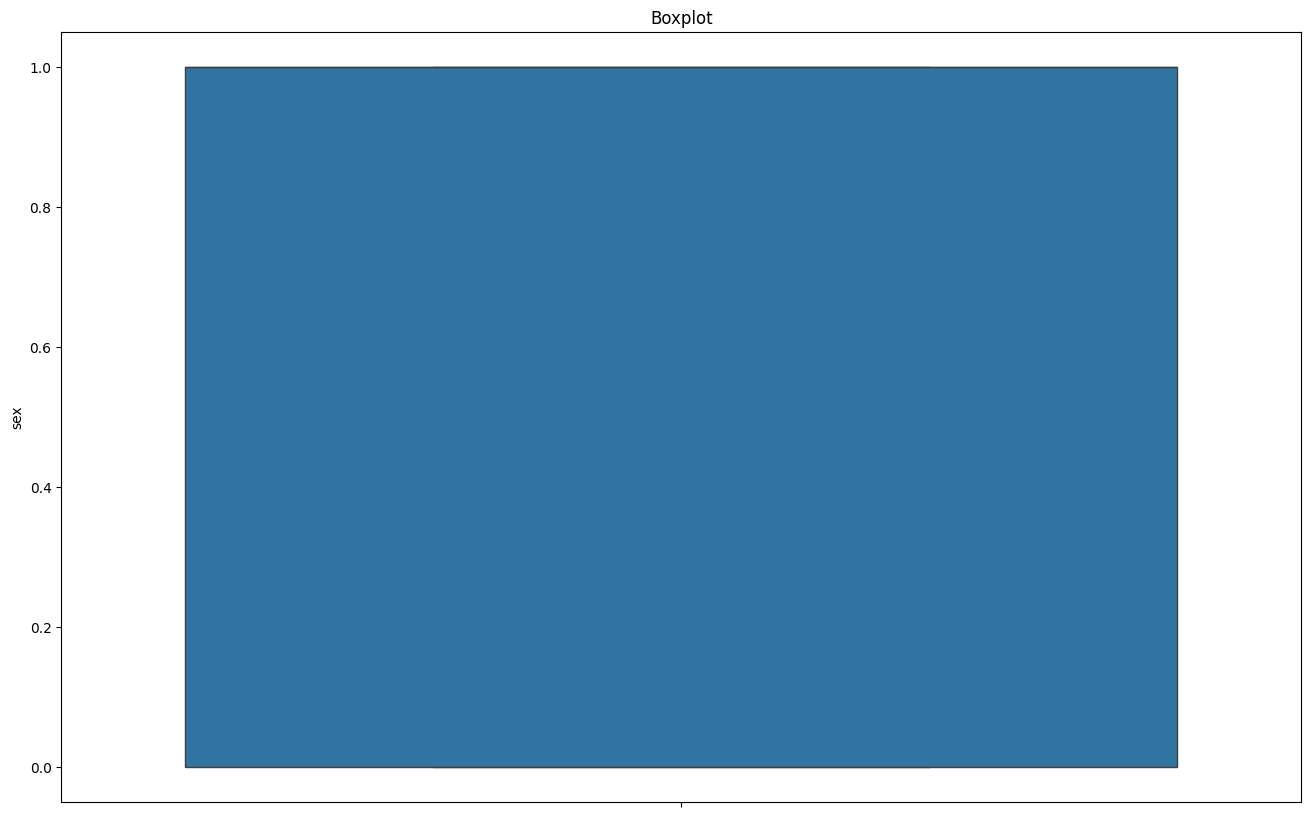

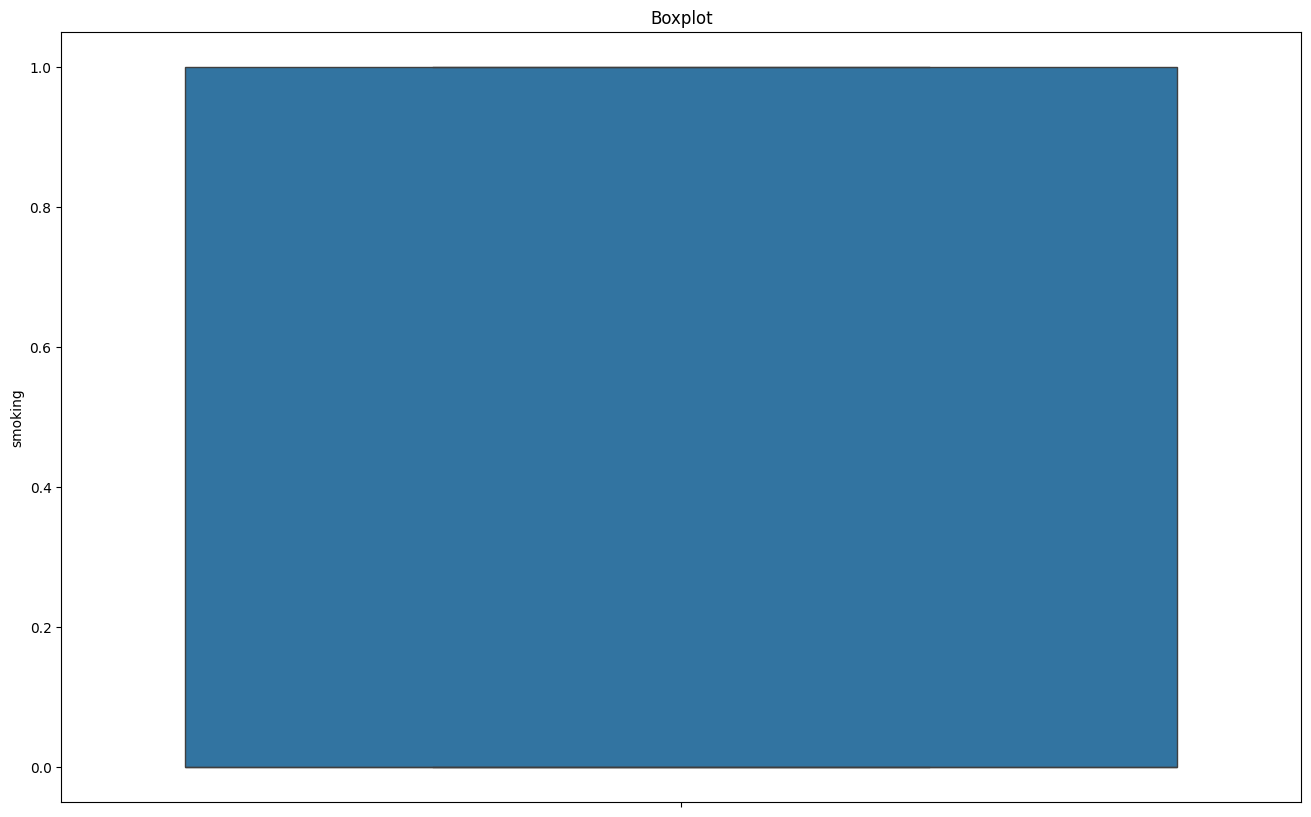

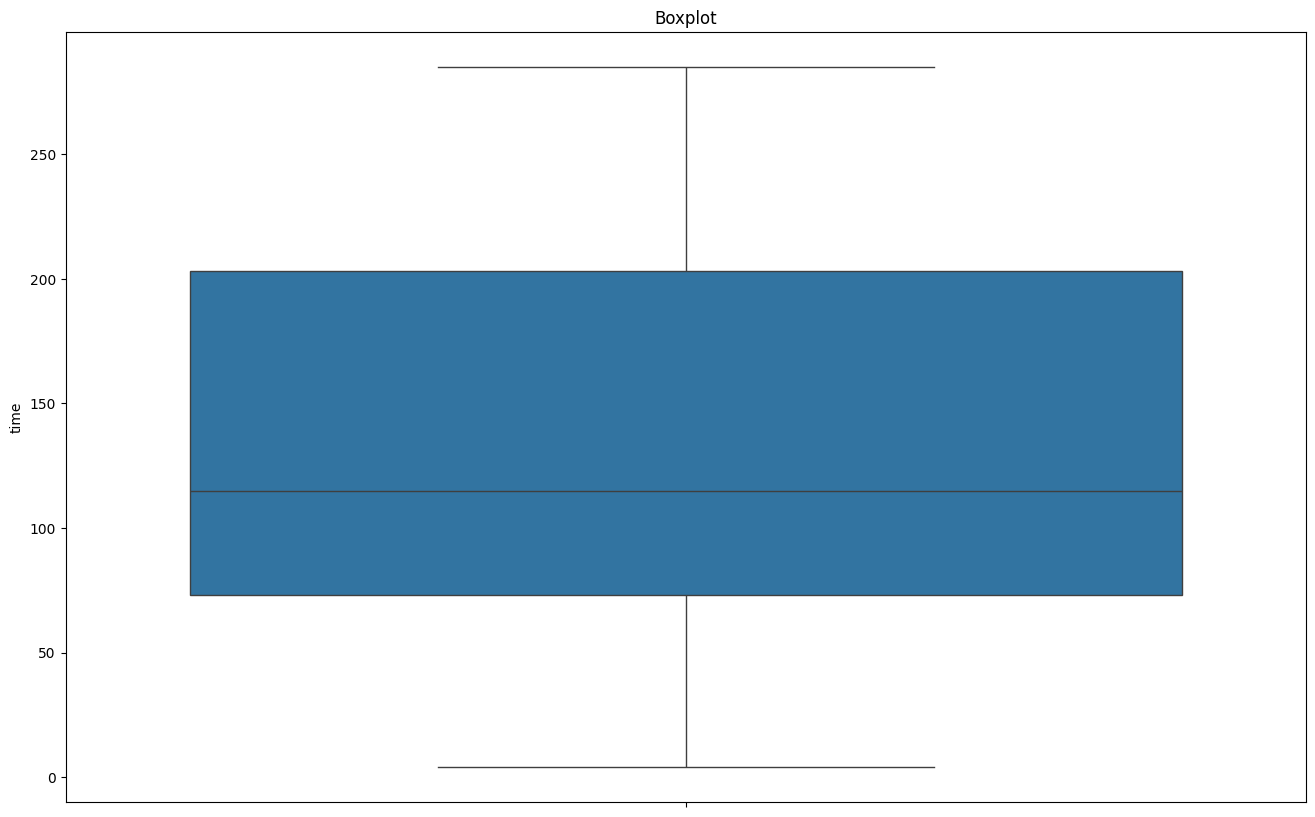

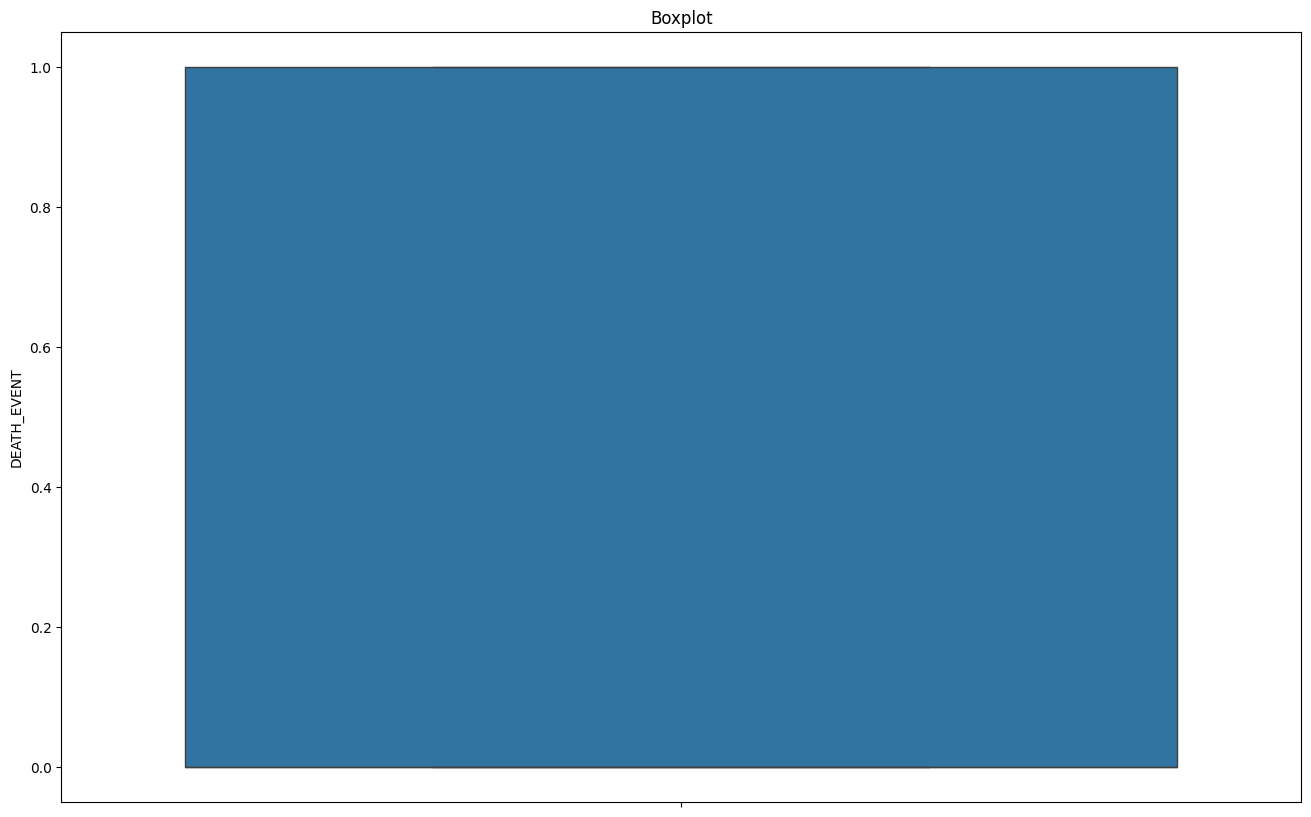

In [8]:
# melihat setiap kolom untuk mencari outlier menggunakan boxplot

for col in df.columns:
  plt.figure(figsize=(16,10))
  sns.boxplot(df[col])
  plt.title('Boxplot')

  plt.show()

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
# creatine pospo, ejection fraction, platelets, serum creatines, serum sodium 
# membuat list untuk kolom yang memiliki outliers
outlier_cols = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

# handling outlier
for cols in outlier_cols:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    df.loc[df[cols] < lower_boundary,cols] = lower_boundary
    df.loc[df[cols] > upper_boundary,cols] = upper_boundary

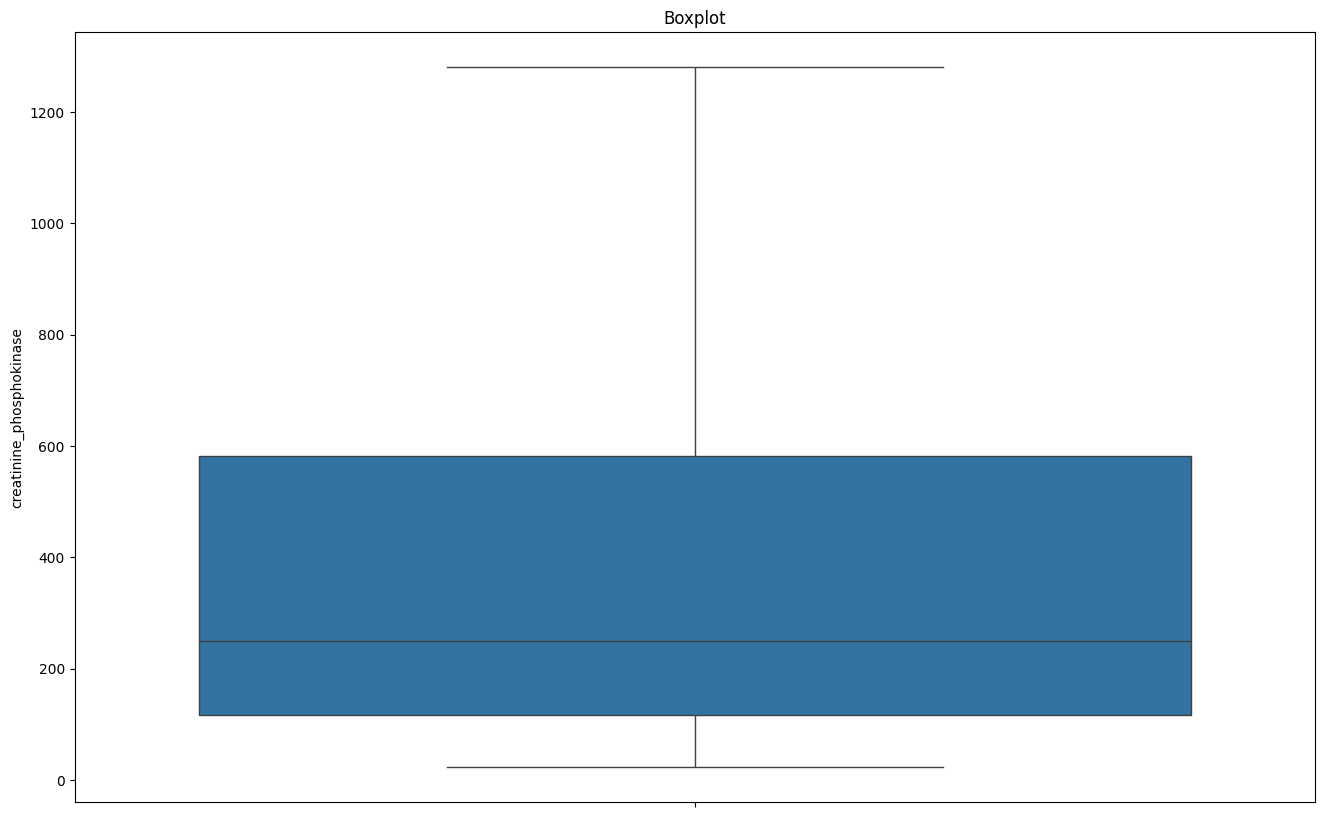

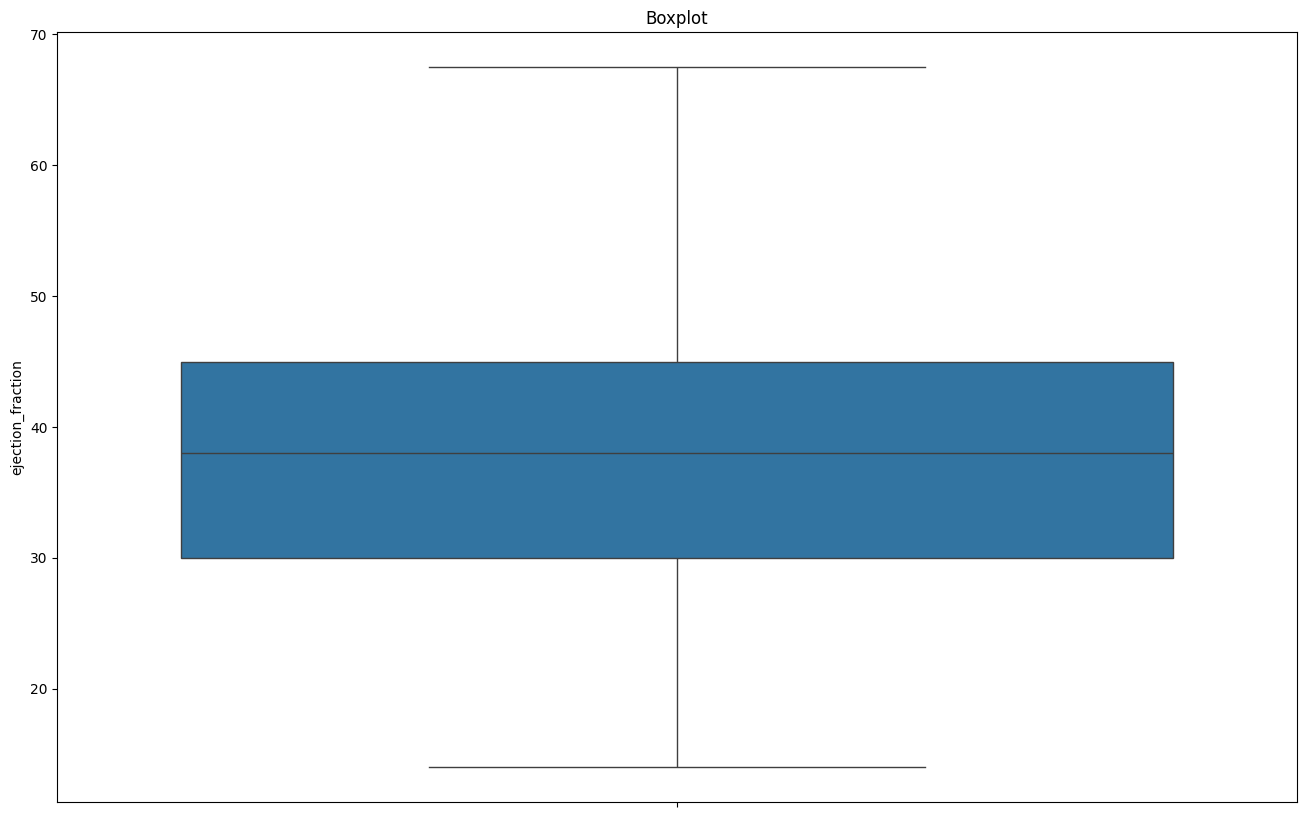

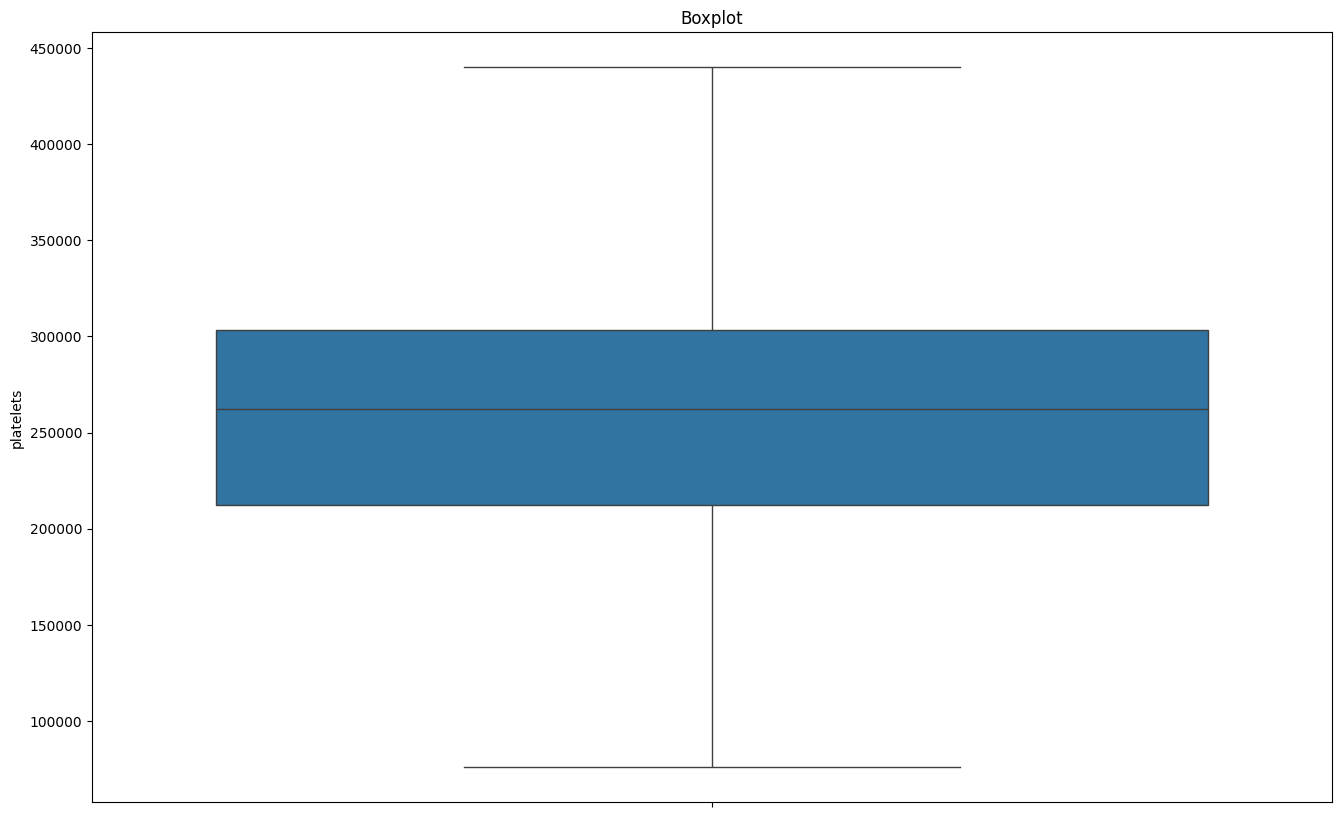

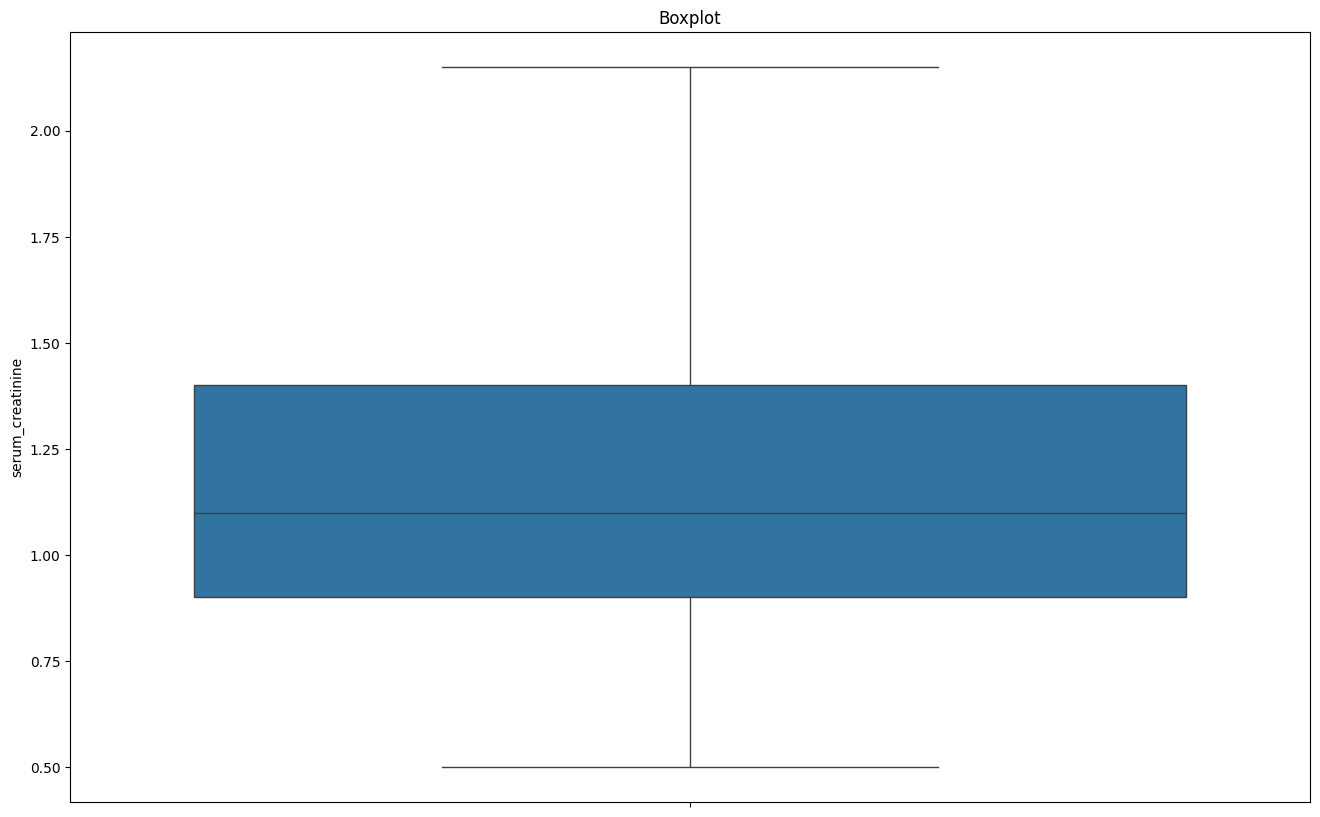

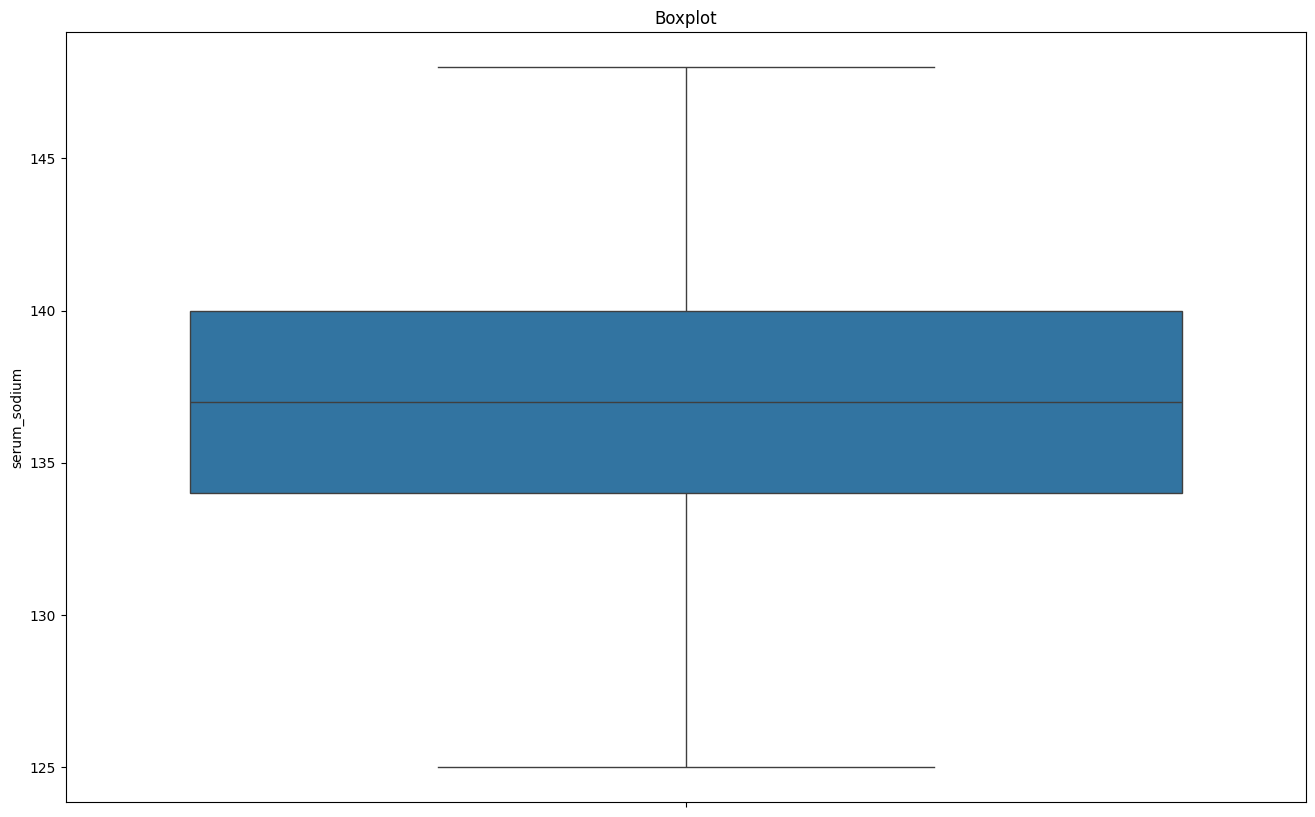

In [11]:
# cek ulang setelah outlier ditangani
for col in outlier_cols:
  plt.figure(figsize=(16,10))
  sns.boxplot(df[col])
  plt.title('Boxplot')

  plt.show()

# E. EDA

## Melihat Correlation Matrix pada dataset

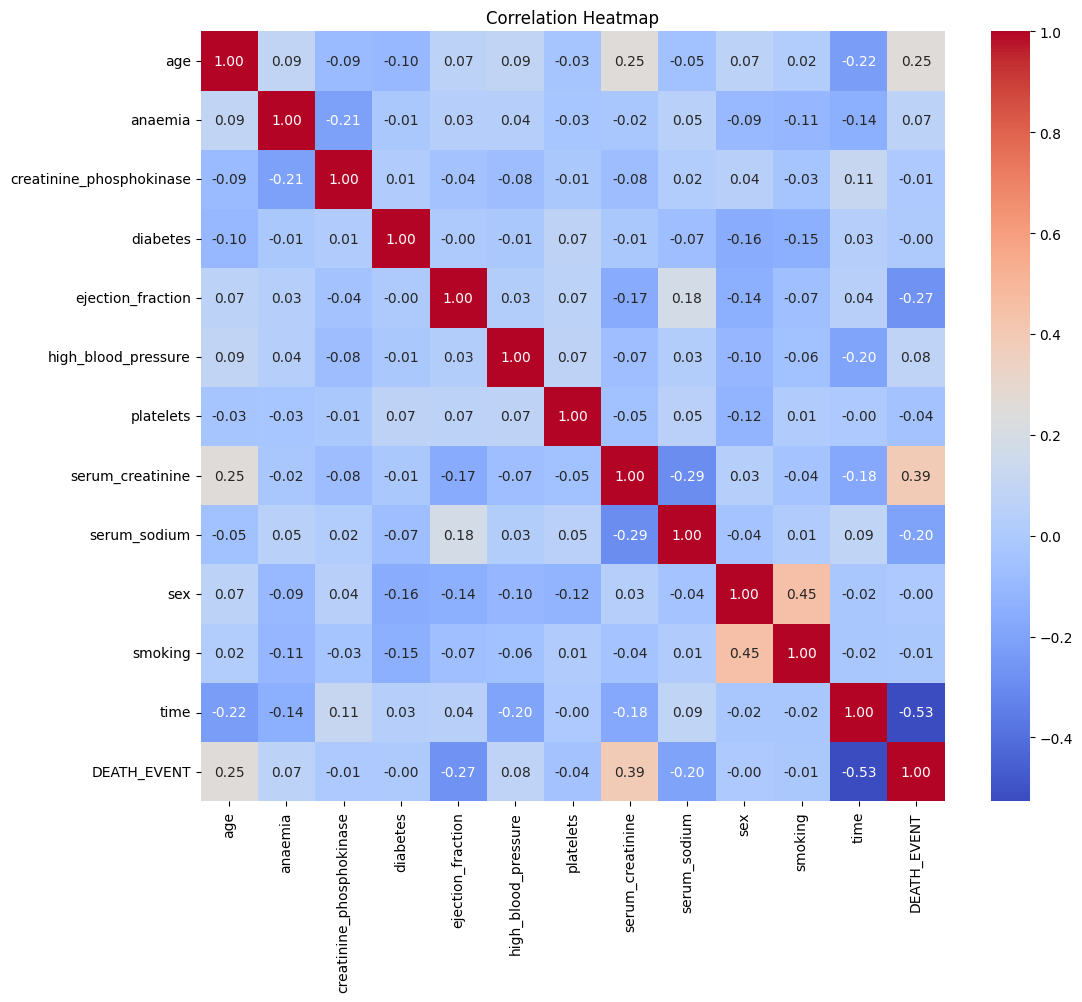

In [12]:
# melihat korelasi antar kolom menggunakan heatmap
correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

dilihat dari heatmap diatas terlihat bahwa korelasi antar kolom terbilang lumayan rendah namun ada juga yang lumayan kuat korelasinya seperti korelasi antara time dengan Death_event, serum_creatinine dengan death_event, uga antara smoking dengan sex 

## Melihat Balanced dari DEATH_EVENT

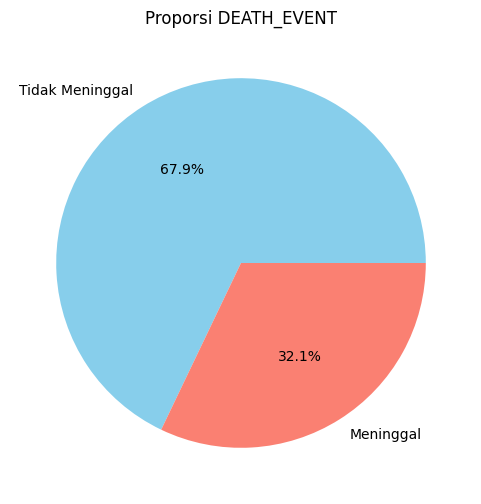

In [13]:
death_event_counts = df['DEATH_EVENT'].value_counts()
labels = ['Tidak Meninggal', 'Meninggal']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(death_event_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proporsi DEATH_EVENT')
plt.show()

Terlihat bahwa target/label dalam dataset  lebih banyak menunjukan tidak meninggal atau 0 daripada meinggalnya para pasien 

## Melihat Pengaruh beberapa kolom terhadap kolom DEATH_EVENT

### a. Analisa Sex dan DEATH_EVENT

In [14]:
# Menghitung jumlah tiap gender berdasarkan death event
gender_group = df.groupby(['DEATH_EVENT', 'sex']).size().reset_index(name='Jumlah')

print(gender_group)

   DEATH_EVENT  sex  Jumlah
0            0    0      71
1            0    1     132
2            1    0      34
3            1    1      62


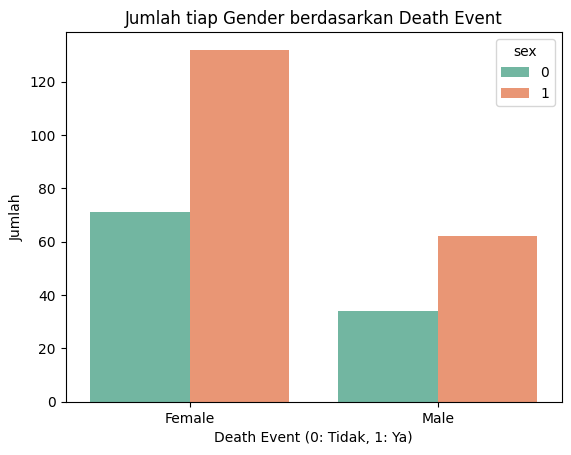

In [15]:
sns.barplot(x='DEATH_EVENT', y='Jumlah', hue='sex', data=gender_group, palette='Set2')

# Menambahkan label dan judul
plt.title('Jumlah tiap Gender berdasarkan Death Event')
plt.xlabel('Death Event (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
# Mengatur label sumbu x
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
# Menampilkan plot
plt.show()

Berdasarkan dari plot diatas terlihat bahwa pria lebih banyak terkena gagal jantung, dengan perbandingan 2 kali lipat dari jumlah wanita yang tekena gagal jantung

### b. Analisa Waktu dan Death_Event

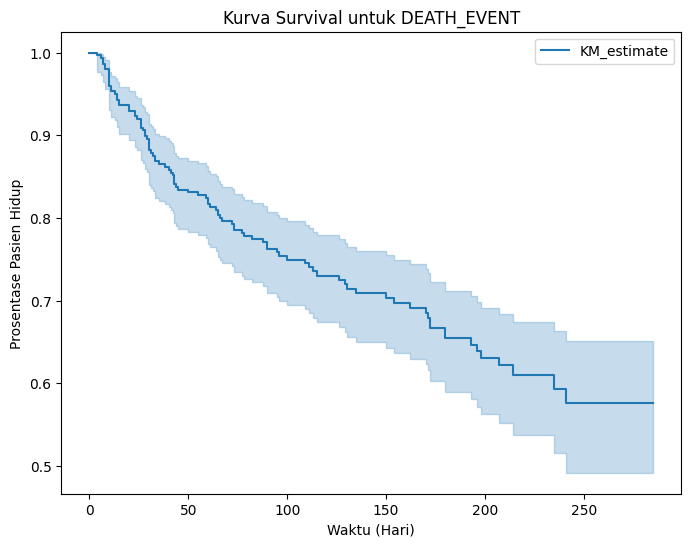

In [16]:
from lifelines import KaplanMeierFitter
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

event_observed = df['DEATH_EVENT']  # kolom event (0: hidup, 1: meninggal)
duration = df['time']  # kolom waktu

# Fit kurva Survival
kmf.fit(duration, event_observed=event_observed)

# Plot kurva Survival
plt.figure(figsize=(8, 6))
kmf.plot()
plt.title('Kurva Survival untuk DEATH_EVENT')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Prosentase Pasien Hidup')
plt.show()

Terlihat dari plot diatas bahwa semakin sedikitnya hari  atau seringnya follow up, persentase kematian pada pasien terlihat rendah dan semakin lamanya pasien melakukan follow up tingkat kematian pada pasien terbilang cukup tinggi 

### c. Analisa kolom creatinine_phosphokinase dan DEATH_EVENT

In [17]:
# Statistik deskriptif untuk level CPK pada pasien yang hidup
mean_cpk_hidup = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase'].mean()
median_cpk_hidup = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase'].median()
std_cpk_hidup = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase'].std()

# Statistik deskriptif untuk level CPK pada pasien yang meninggal
mean_cpk_meninggal = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase'].mean()
median_cpk_meninggal = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase'].median()
std_cpk_meninggal = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase'].std()

print("Statistik Deskriptif Level CPK pada Pasien yang Hidup:")
print(f"Rata-rata: {mean_cpk_hidup}")
print(f"Median: {median_cpk_hidup}")
print(f"Standar Deviasi: {std_cpk_hidup}")
print("\nStatistik Deskriptif Level CPK pada Pasien yang Meninggal:")
print(f"Rata-rata: {mean_cpk_meninggal}")
print(f"Median: {median_cpk_meninggal}")
print(f"Standar Deviasi: {std_cpk_meninggal}")

Statistik Deskriptif Level CPK pada Pasien yang Hidup:
Rata-rata: 425.8965517241379
Median: 245.0
Standar Deviasi: 392.5229833567686

Statistik Deskriptif Level CPK pada Pasien yang Meninggal:
Rata-rata: 420.6588541666667
Median: 259.0
Standar Deviasi: 372.0415637501012


Kesimpulan dari analisa statistik tersebut adalah meskipun terdapat sedikit perbedaan dalam rata-rata dan median level CPK antara pasien yang hidup dan meninggal, perbedaan tersebut tidak terlalu besar. 

Standar deviasi yang tinggi menunjukkan variasi yang besar dalam level CPK di antara pasien pada kedua kelompok, yang menunjukkan bahwa ada pasien dengan level CPK yang tinggi maupun rendah di dalam kelompok tersebut. Hal ini menunjukkan bahwa level CPK mungkin tidak menjadi faktor penentu tunggal terkait kematian pada pasien gagal jantung.

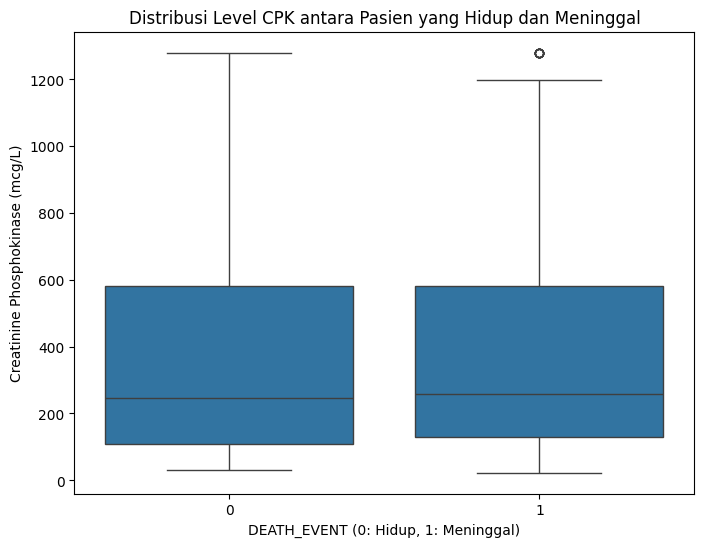

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title('Distribusi Level CPK antara Pasien yang Hidup dan Meninggal')
plt.xlabel('DEATH_EVENT (0: Hidup, 1: Meninggal)')
plt.ylabel('Creatinine Phosphokinase (mcg/L)')
plt.show()

ketika mencoba visualisasi kan menggunakan boxplot lebih jelas bahwa tidak terlalu ada perbedaan antara CPK dengan death_event 0 dan CPK dengan death_event 1

distribusi CPK pada pasien yang hidup dan yang meninggal relatif serupa, hal ini dapat menunjukkan bahwa level CPK mungkin bukan faktor tunggal yang signifikan dalam memprediksi kematian pada pasien gagal jantung.

## Analisa Kolom Anameia

In [19]:
# melihat statistike kolom anameia dengan death event 
death_event_stats = df.groupby('DEATH_EVENT')['anaemia'].describe()
print(death_event_stats)

             count      mean       std  min  25%  50%  75%  max
DEATH_EVENT                                                    
0            203.0  0.408867  0.492840  0.0  0.0  0.0  1.0  1.0
1             96.0  0.479167  0.502188  0.0  0.0  0.0  1.0  1.0


* Pasien yang mengalami kematian cenderung memiliki persentase sedikit lebih tinggi dalam mengalami anaemia (rata-rata sekitar 48.0%) dibandingkan dengan pasien yang tidak mengalami kematian (rata-rata sekitar 40.9%).

* Namun, distribusi anaemia pada kedua kelompok cukup bervariasi, ditunjukkan oleh standar deviasi yang relatif tinggi. Ini berarti ada variasi yang signifikan dalam persentase pasien dengan atau tanpa anaemia di antara kedua kelompok.

Meskipun terdapat perbedaan rata-rata dalam persentase anaemia antara pasien yang mengalami kematian dan yang tidak, variasi yang besar menunjukkan bahwa anaemia mungkin merupakan faktor yang mempengaruhi kematian pada pasien gagal jantung

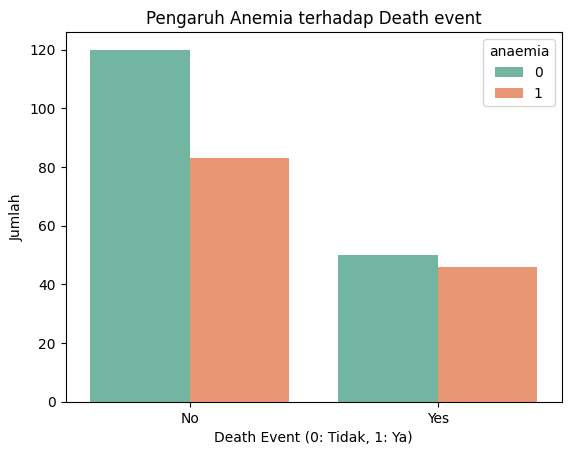

In [20]:
# Menghitung jumlah tiap gender berdasarkan death event
anemia = df.groupby(['DEATH_EVENT', 'anaemia']).size().reset_index(name='Jumlah')
sns.barplot(x='DEATH_EVENT', y='Jumlah', hue='anaemia', data=anemia, palette='Set2')

# Menambahkan label dan judul
plt.title('Pengaruh Anemia terhadap Death event')
plt.xlabel('Death Event (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
# Mengatur label sumbu x
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
# Menampilkan plot
plt.show()

dilihat dari perbandingan barplot bahwa, perbandingan pasien meninggal yang terkena anemia terbilang cukup imbang bisa disimpulkan bahwa kolom anaemia ini merupakan salah saktu faktor penentu terjadinya kematian.

## Analisa kolom smoking dan diabetes

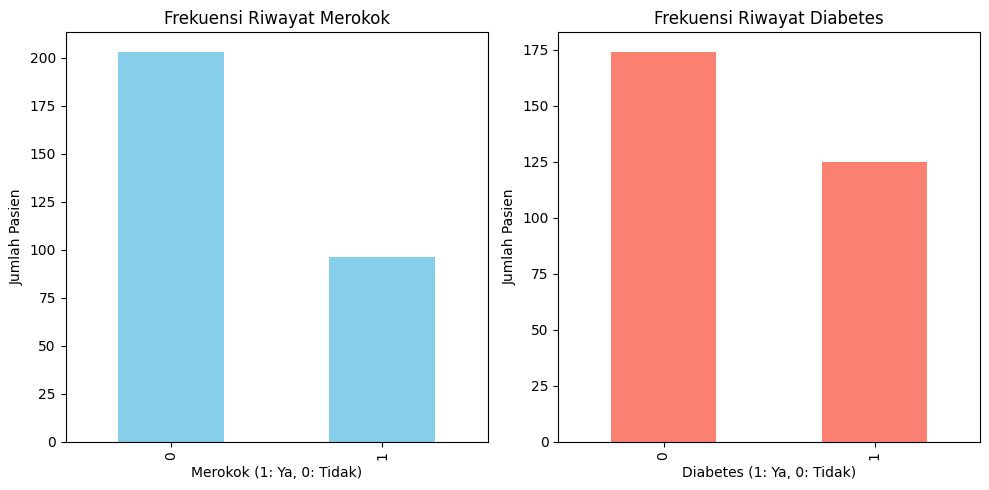

In [21]:
# Menghitung frekuensi riwayat merokok dan diabetes
smoking_freq = df['smoking'].value_counts()
diabetes_freq = df['diabetes'].value_counts()

# Plot bar untuk riwayat merokok
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
smoking_freq.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Riwayat Merokok')
plt.xlabel('Merokok (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Pasien')

# Plot bar untuk riwayat diabetes
plt.subplot(1, 2, 2)
diabetes_freq.plot(kind='bar', color='salmon')
plt.title('Frekuensi Riwayat Diabetes')
plt.xlabel('Diabetes (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Pasien')

plt.tight_layout()
plt.show()

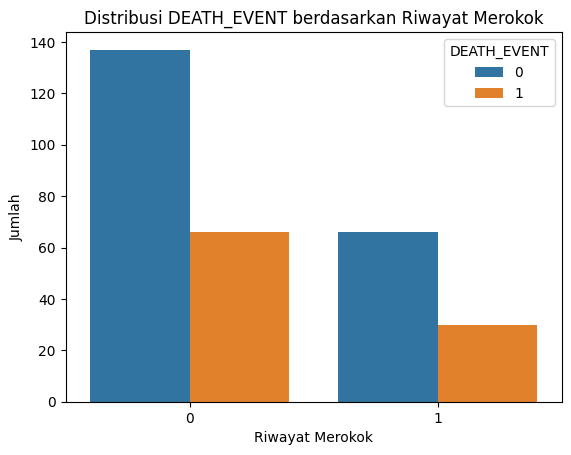

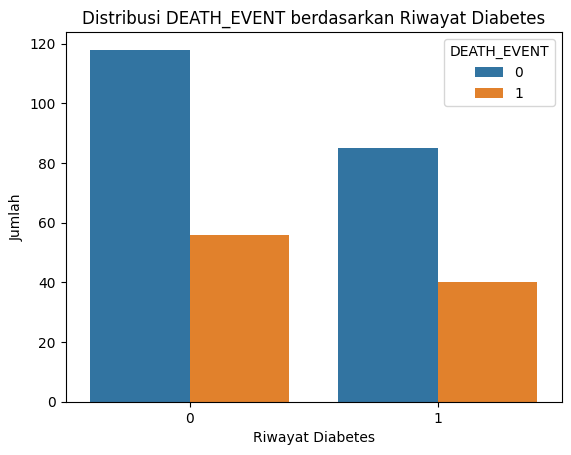

In [22]:
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')
plt.title('Distribusi DEATH_EVENT berdasarkan Riwayat Merokok')
plt.xlabel('Riwayat Merokok')
plt.ylabel('Jumlah')
plt.show()

sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')
plt.title('Distribusi DEATH_EVENT berdasarkan Riwayat Diabetes')
plt.xlabel('Riwayat Diabetes')
plt.ylabel('Jumlah')
plt.show()

dari perbandingan antara pasien yang merokok dan tidak merokok terhadap death event, terlihat bahwa merokok bukanlah faktor utama terhadap terjadinya kematian pada dataset ini. Pasien meninggal yang juga merokok hanya sedikit kurang lebih hanya 30 an. dan kasus kematian pada pasien yang tidak merokok ada 60 an lebih

## Analisa Kolom Age

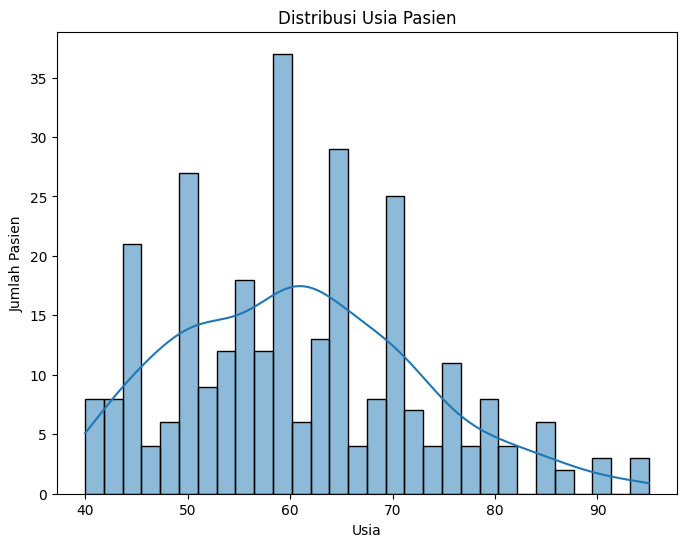

In [23]:
# melihat distibusi kolom age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')
plt.show()

pada kolom age terlihat bahwa distribusinya kurang merata. Jumlah pasien yang paling banyak ada pada usia 60 tahun dan juga lumayan tinggi pada usia 45 an, 50, 65 an dan 70 tahun 

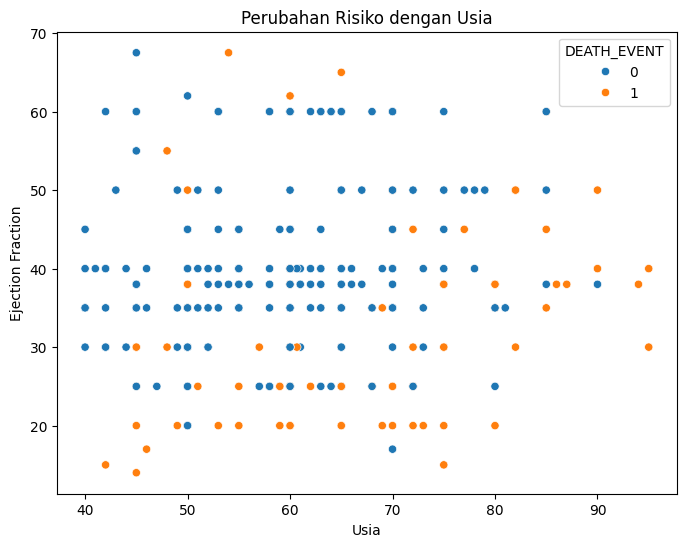

In [24]:
# melihat perubahan resiko pasien 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT')
plt.title('Perubahan Risiko dengan Usia')
plt.xlabel('Usia')
plt.ylabel('Ejection Fraction')
plt.show()

Dari scatter plot diatas terlihat bahwa risiko gagal jantung bisa jadi meningkat seiring bertambahnya usia. Dan untuk Ejection fraction sendiri terlihat bahwa banyaknya resiko kematian ketika ejection fraction nya sedikit  . Memang ada juga yang meninggal dengan ejection fraction tinggi namun kebanuakan meninggal ketika ejection fraction di angkan 20 an

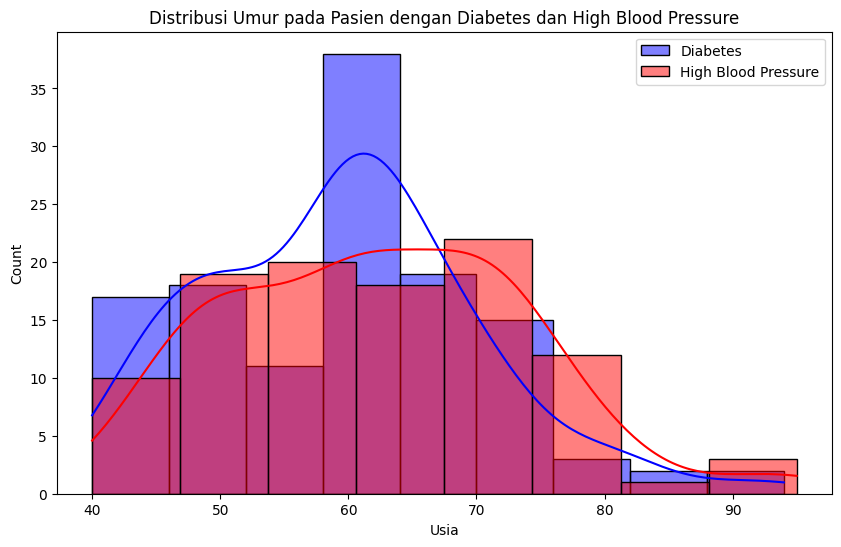

In [25]:
# melihat pengaruh umur pada diabetes dan high blood presure
plt.figure(figsize=(10, 6))

# Histogram untuk umur pasien dengan diabetes
sns.histplot(data=df[df['diabetes'] == 1], x='age', kde=True, color='blue', label='Diabetes', alpha=0.5)

# Histogram untuk umur pasien dengan high blood pressure
sns.histplot(data=df[df['high_blood_pressure'] == 1], x='age', kde=True, color='red', label='High Blood Pressure', alpha=0.5)

plt.title('Distribusi Umur pada Pasien dengan Diabetes dan High Blood Pressure')
plt.xlabel('Usia')
plt.legend()
plt.show()


Untuk pasien yang mempunyai diabetes terbanyak pada usia 60 an. dan untuk pasien dengan umur 50 an sampai umur 70 an  mempunyai high blood presure lumayan banyak. dan pasien yang memiliki kedua riwayat tersebut, bisa dibilang banyak karena dari plot diatas keduanya sering bertemu pada usia 40 sampai 70 an. 

## Melihat hubungan kolom platelets, serum_sodium, serum_creatinine dengan death event 


In [26]:
# Menghitung korelasi antara variabel numerik dengan DEATH_EVENT
correlation = df[['platelets', 'serum_sodium', 'serum_creatinine', 'DEATH_EVENT']].corr()

# Tampilkan matriks korelasi
print(correlation)

                  platelets  serum_sodium  serum_creatinine  DEATH_EVENT
platelets          1.000000      0.054313         -0.052139    -0.044132
serum_sodium       0.054313      1.000000         -0.293201    -0.201320
serum_creatinine  -0.052139     -0.293201          1.000000     0.388469
DEATH_EVENT       -0.044132     -0.201320          0.388469     1.000000


* Tidak ada korelasi yang signifikan antara platelets dan kemungkinan kematian.

* Korelasi antara serum sodium dengan kematian sedang hingga lemah.
* Korelasi antara serum creatinine dengan kematian cukup signifikan, menunjukkan bahwa tingkat serum creatinine 
yang lebih tinggi berkorelasi dengan peningkatan kemungkinan terjadinya kematian.

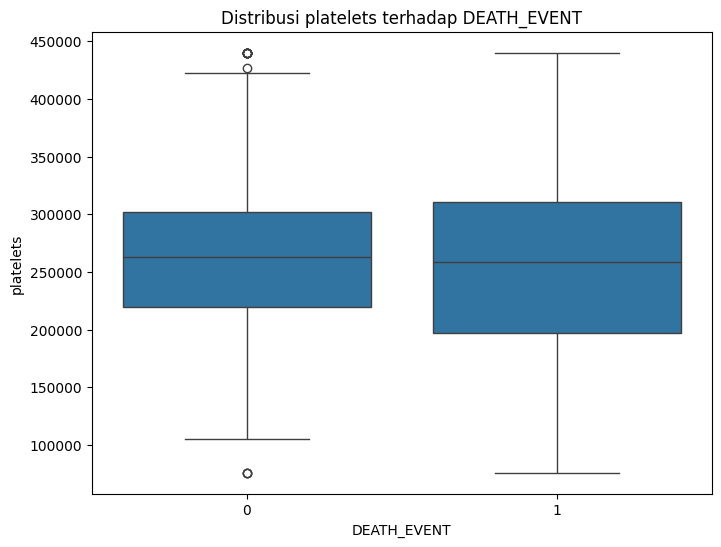

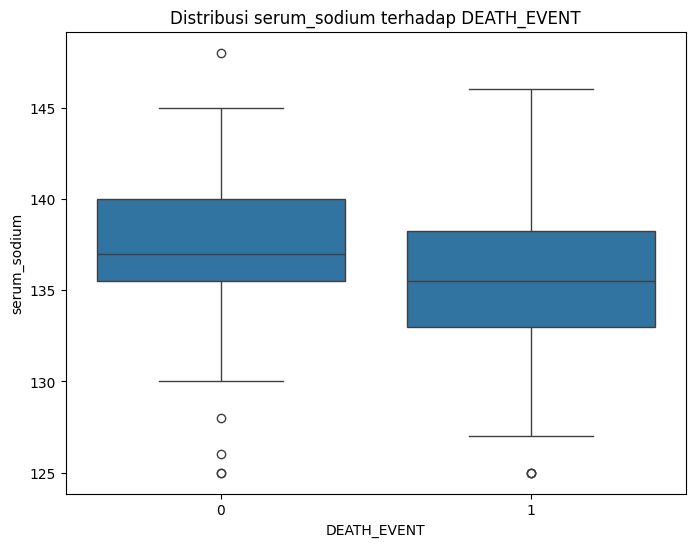

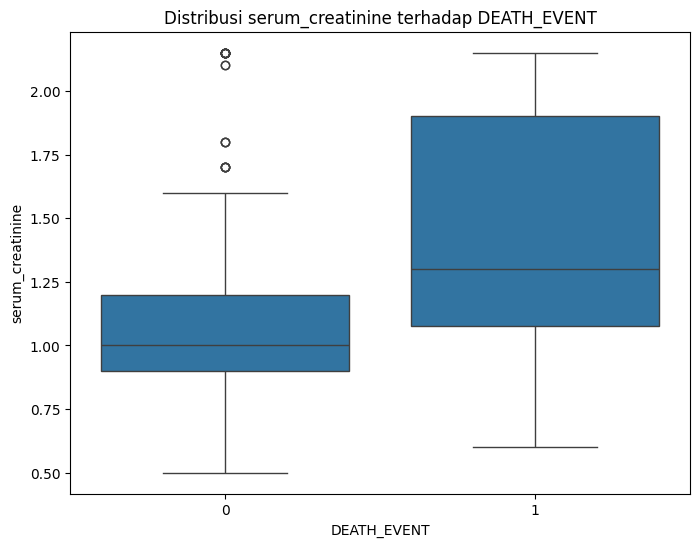

In [27]:
# Membuat boxplot untuk setiap variabel numerik berdasarkan 'DEATH_EVENT' untuk melihat distribusi data dan perbedaan antara kategori 'DEATH_EVENT'.
variables = ['platelets', 'serum_sodium', 'serum_creatinine']

# Looping untuk membuat boxplot untuk setiap variabel
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='DEATH_EVENT', y=var)
    plt.title(f'Distribusi {var} terhadap DEATH_EVENT')
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(var)
    plt.show()

dari ketiga Boxplot diatas untuk pengaruh dari kolom platelets tidak terlalu beda antara meninggal atau tidaknya. Namun pada kolom serum_creatinine terlihat bahwa penggunaan serum_creatinine ini lumayan berpengaruh pada kematian. 

# F. PRE PROCESSING

## Split Data Menjadi X dan y

In [28]:
# split data menjadi train X dan y

X = df.drop(columns='DEATH_EVENT')
y = df[['DEATH_EVENT']]

## Normalisasi Data Menggunakan MinMaxScaler

In [29]:
# Normalisasi X menggunakan StandarScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

## Split Data Menjadi Train dan Test

In [30]:
# SPLIT DATA train dan test untuk berbagai algoritma
X_trainLr, X_testLr, y_trainLr, y_testLr = train_test_split(X, y, test_size=0.2, random_state=42)
X_trainKnn, X_testKnn, y_trainKnn, y_testKnn = train_test_split(X, y, test_size=0.2, random_state=77)
X_trainSvm, X_testSvm, y_trainSvm, y_testSvm = train_test_split(X, y, test_size=0.2, random_state=66)
X_trainNb, X_testNb, y_trainNb, y_testNb = train_test_split(X, y, test_size=0.2, random_state=19)
X_trainDt, X_testDt, y_trainDt, y_testDt = train_test_split(X, y, test_size=0.2, random_state=2003)
X_trainRf, X_testRf, y_trainRf, y_testRf = train_test_split(X, y, test_size=0.2, random_state=69)

# G. PENDEFINISIAN MODEL

In [31]:
# logistic regression
lr= AdaBoostClassifier(LogisticRegression(C=100000, solver='lbfgs'), n_estimators=100, learning_rate = 0.1, random_state= 0)

# SVM
Svm= AdaBoostClassifier(SVC(C=100000, gamma='scale', probability=True), n_estimators=100, learning_rate = 0.1,random_state= 0)

#  KNN
Knn = KNeighborsClassifier(n_neighbors=6)

# Random Forest
Rf = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)

# Decision Tree
Dt = DecisionTreeClassifier(max_depth=5, random_state=0)

# Naive Bayes
Nb = GaussianNB()

# H. PELATIHAN MODEL

In [32]:
# Logistic Regression
lr_model =lr.fit(X_trainLr,y_trainLr)
y_pred_lr = lr.predict(X_testLr)

In [33]:
# SVM
Svm_model=Svm.fit(X_trainSvm,y_trainSvm)
y_pred_Svm = Svm.predict(X_testSvm)

In [34]:
# SVM
Knn_model=Knn.fit(X_trainKnn,y_trainKnn)
y_pred_Knn = Knn.predict(X_testKnn)

In [35]:
# Random Forest
Rf_model = Rf.fit(X_trainRf,y_trainRf)
y_pred_Rf = Rf.predict(X_testRf)

In [36]:
# decision Tree
Dt_model = Dt.fit(X_trainDt,y_trainDt)
y_pred_Dt = Dt.predict(X_testDt)

In [37]:
# Naive Bayes
Nb_model = Nb.fit(X_trainNb,y_trainNb)
y_pred_Nb = Nb.predict(X_testNb)

# I. EVALUASI MODEL

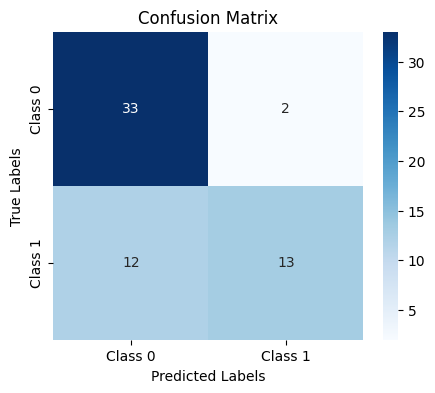

In [38]:
# Logistic Regression

# melihat confusion matrix
lr_cm = confusion_matrix(y_testLr, y_pred_lr)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# melihat classification report logistic regression
print("Classification Report:\n", classification_report(y_testLr, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60



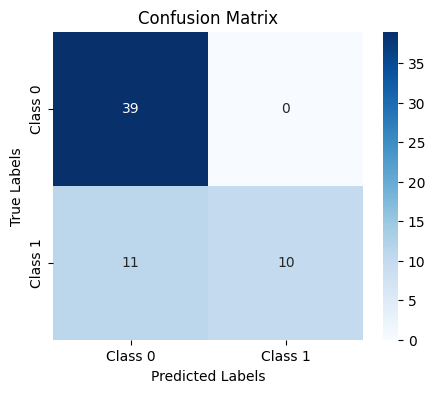

In [40]:
# SVM
# melihat confusion matrix
Svm_cm = confusion_matrix(y_testSvm, y_pred_Svm)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(Svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# melihat classification report SVM
print("Classification Report:\n", classification_report(y_testSvm, y_pred_Svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        39
           1       1.00      0.48      0.65        21

    accuracy                           0.82        60
   macro avg       0.89      0.74      0.76        60
weighted avg       0.86      0.82      0.80        60



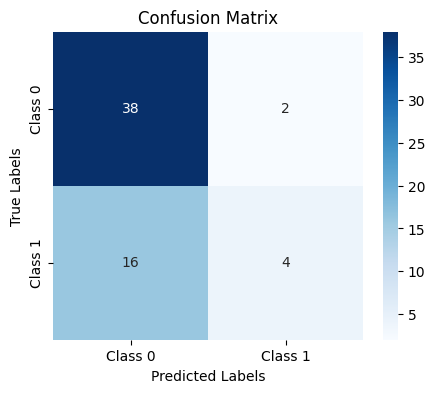

In [42]:
# KNN
# melihat confusion matrix
Knn_cm = confusion_matrix(y_testKnn, y_pred_Knn)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(Knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# melihat classification report SVM
print("Classification Report:\n", classification_report(y_testKnn, y_pred_Knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.95      0.81        40
           1       0.67      0.20      0.31        20

    accuracy                           0.70        60
   macro avg       0.69      0.57      0.56        60
weighted avg       0.69      0.70      0.64        60



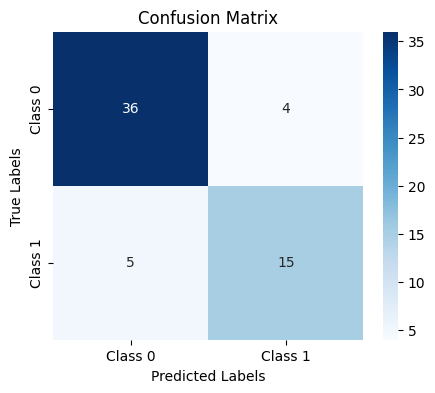

In [44]:
# Random Forest
# melihat confusion matrix
Rf_cm = confusion_matrix(y_testRf, y_pred_Rf)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(Rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# melihat classification report Random Forest
print("Classification Report:\n", classification_report(y_testRf, y_pred_Rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.79      0.75      0.77        20

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



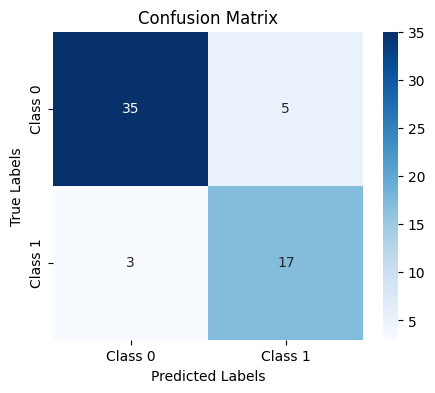

In [46]:
# Decision Tree
# melihat confusion matrix
Dt_cm = confusion_matrix(y_testDt, y_pred_Dt)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(Dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [47]:
# melihat classification report Decision Tree
print("Classification Report:\n", classification_report(y_testDt, y_pred_Dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.77      0.85      0.81        20

    accuracy                           0.87        60
   macro avg       0.85      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60



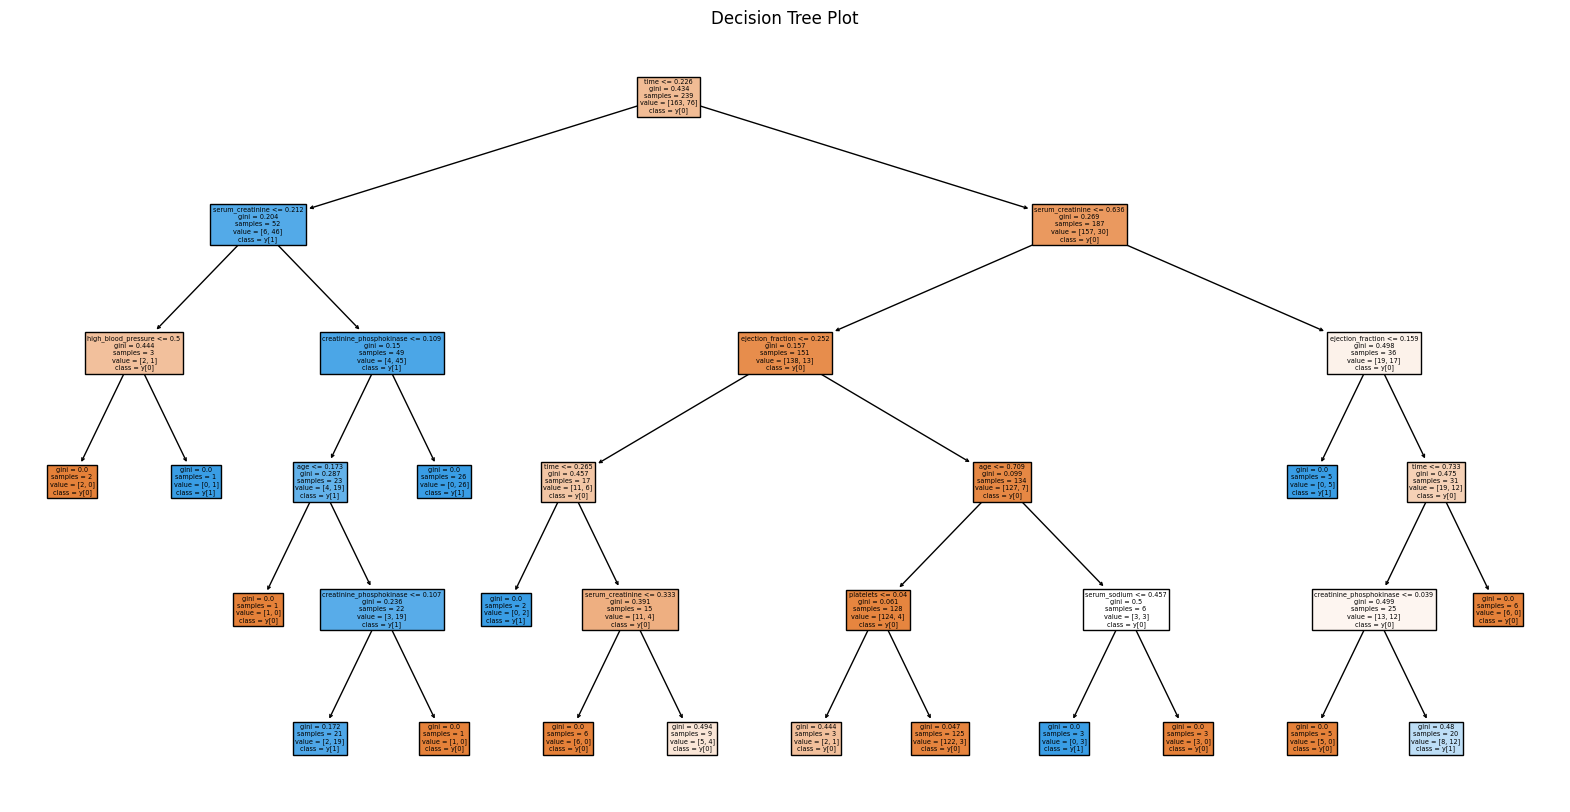

In [48]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
plt.figure(figsize=(20, 10))
plot_tree(Dt_model, filled=True, feature_names= features, class_names=True)
plt.title("Decision Tree Plot")
plt.show()

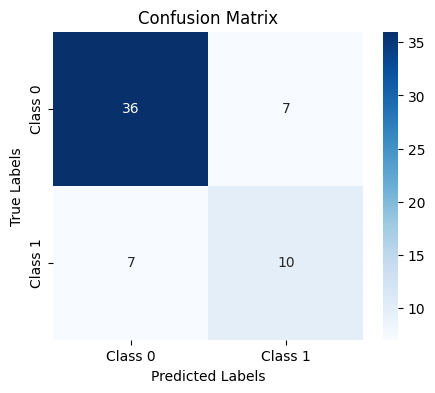

In [49]:
# naive bayes
# melihat confusion matrix
Nb_cm = confusion_matrix(y_testNb, y_pred_Nb)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(Nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# melihat classification report naive Bayes
print("Classification Report:\n", classification_report(y_testNb, y_pred_Nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.59      0.59      0.59        17

    accuracy                           0.77        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.77      0.77      0.77        60



## Melihat Perbandingan Antar Model

In [51]:
lr_acc = accuracy_score(y_testLr, y_pred_lr)
Svm_acc = accuracy_score(y_testSvm, y_pred_Svm)
Knn_acc = accuracy_score(y_testKnn, y_pred_Knn)
Rf_acc = accuracy_score(y_testRf, y_pred_Rf)
Dt_acc = accuracy_score(y_testDt, y_pred_Dt)
Nb_acc = accuracy_score(y_testNb, y_pred_Nb)

In [52]:
acc_list =[lr_acc,Svm_acc,Knn_acc,Rf_acc,Dt_acc,Nb_acc]
Model_list = ["Logistic Regression","SupportVector","KNeighborsClassifier","RandomForest","DecisionTree","Naive Bayes"]

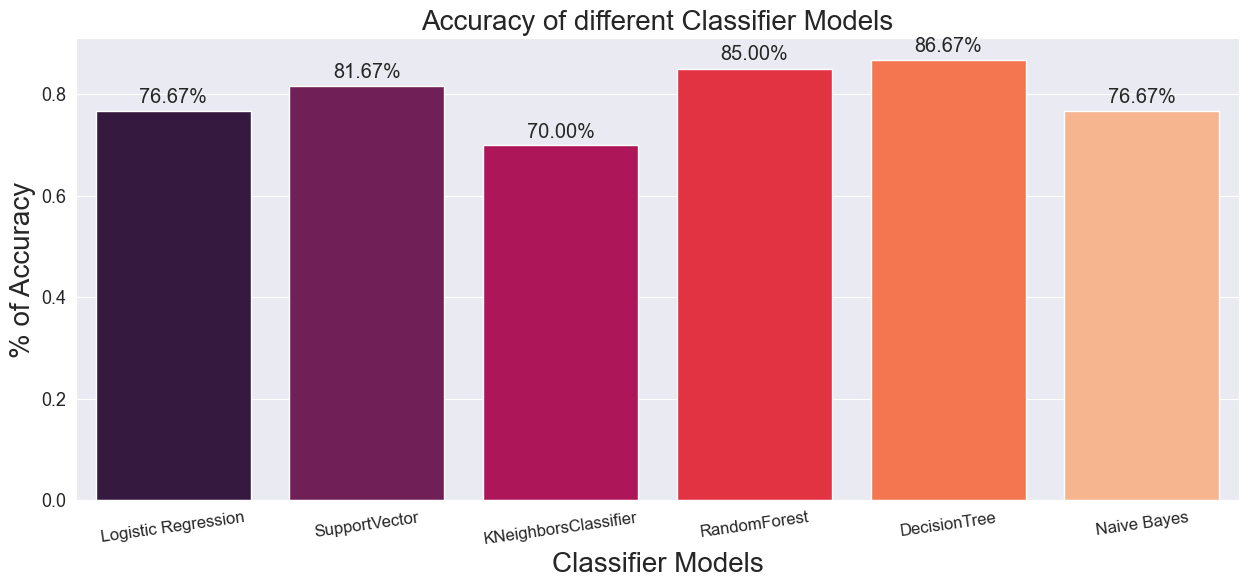

In [53]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=Model_list, y=acc_list, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [54]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# J. MODEL INFERENCE

In [55]:
# Menyiapkan data baru
new_data = {
    'age': [65],  # Isi dengan nilai yang sesuai
    'anaemia': [0],
    'creatinine_phosphokinase': [200],
    'diabetes': [1],
    'ejection_fraction': [25],
    'high_blood_pressure': [1],
    'platelets': [300000],
    'serum_creatinine': [0.9],
    'serum_sodium': [130],
    'sex': [1],  # 1 untuk laki-laki, 0 untuk perempuan
    'smoking': [1],
    'time': [150]
}

data_test = pd.DataFrame(new_data)


In [56]:
# Normalisasi dataset baru
data_test = scaler.fit_transform(data_test)

In [57]:
# membuat function untuk kondisi prediksi
def pred(model_predict):
    if model_predict == 0:
        return f'Diprediksi nilai {model_predict}, maka pasien tidak selamat'
    elif model_predict ==1:
        return f'Diprediksi nilai {model_predict}, maka pasien  Selamat'
    else:
        return 'Prediksi Error'


In [58]:
# mencoba memprediksi dengan berbagai model

# logistic regression
lr_pred = lr_model.predict(data_test)
print('Logistic Regression:',pred(lr_pred))

# SVM
Svm_pred = Svm_model.predict(data_test)
print('SVM: ',pred(Svm_pred))

# KNN
Knn_pred = Knn_model.predict(data_test)
print('KNN:',pred(Knn_pred))

# Random FOrest
Rf_pred = Rf_model.predict(data_test)
print('Random Forest:',pred(Rf_pred))

# Decision Tree
Dt_pred = Dt_model.predict(data_test)
print('Decision Tree:',pred(Dt_pred))

# Naive Bayes
Nb_pred = Nb_model.predict(data_test)
print('Naive Bayes:',pred(Nb_pred))




Logistic Regression: Diprediksi nilai [1], maka pasien  Selamat
SVM:  Diprediksi nilai [1], maka pasien  Selamat
KNN: Diprediksi nilai [0], maka pasien tidak selamat
Random Forest: Diprediksi nilai [1], maka pasien  Selamat
Decision Tree: Diprediksi nilai [0], maka pasien tidak selamat
Naive Bayes: Diprediksi nilai [1], maka pasien  Selamat


Terlihat ada perbedaan prediksi pada keenam model, pada model KNN dan Decision Tree memprediksi bahwa pasien  selamat. Dan pada model Lr,SVM,Random Forest dan Naive Bayes memprediksi bahwa pasien tidak selamat

## Mencoba Prediksi dengan Data yang sudah ada di dataset

In [59]:
df.iloc[0]

age                             75.0
anaemia                          0.0
creatinine_phosphokinase       582.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              1.0
platelets                   265000.0
serum_creatinine                 1.9
serum_sodium                   130.0
sex                              1.0
smoking                          0.0
time                             4.0
DEATH_EVENT                      1.0
Name: 0, dtype: float64

In [60]:
data_uji = {
    'age': [75], 
    'anaemia': [0],
    'creatinine_phosphokinase': [582.0],
    'diabetes': [0],
    'ejection_fraction': [20],
    'high_blood_pressure': [1],
    'platelets': [265000.0],
    'serum_creatinine': [1.9],
    'serum_sodium': [130],
    'sex': [1],  
    'smoking': [1],
    'time': [4]
}

data_uji = pd.DataFrame(data_uji)

# Normalisasi 
data_uji = scaler.fit_transform(data_uji)

In [61]:
# prediksi 

# logistic regression
lr_pred_uji = lr_model.predict(data_uji)
print('Logistic Regression:',pred(lr_pred_uji))

# SVM
Svm_pred_uji = Svm_model.predict(data_uji)
print('SVM: ',pred(Svm_pred_uji))

# KNN
Knn_pred_uji = Knn_model.predict(data_uji)
print('KNN:',pred(Knn_pred_uji))

# Random FOrest
Rf_pred_uji = Rf_model.predict(data_uji)
print('Random Forest:',pred(Rf_pred_uji))

# Decision Tree
Dt_pred_uji = Dt_model.predict(data_uji)
print('Decision Tree:',pred(Dt_pred_uji))

# Naive Bayes
Nb_pred_uji = Nb_model.predict(data_uji)
print('Naive Bayes:',pred(Nb_pred_uji))




Logistic Regression: Diprediksi nilai [1], maka pasien  Selamat
SVM:  Diprediksi nilai [1], maka pasien  Selamat
KNN: Diprediksi nilai [0], maka pasien tidak selamat
Random Forest: Diprediksi nilai [1], maka pasien  Selamat
Decision Tree: Diprediksi nilai [0], maka pasien tidak selamat
Naive Bayes: Diprediksi nilai [1], maka pasien  Selamat


Disini lagi lagi KNN dan Decision tree yang memiliki tingkat akurasi tinggi memprediksi bahwa pasien selamat.
Padahal data untuk prediksi merupakan data dari dataset, dan memiliki DEATH_EVENT 1(tidak selamat).
Dan di model lainnya memprediksi benar bahwa pasien tidak selamat.

# K. PENGAMBILAN KESIMPULAN  

### Kesimpulan Analisis Data Heart Failure:

1. **Dataset dan Target:**
   - Dataset ini terdiri dari 13 kolom dengan salah satunya sebagai target, yaitu `DEATH_EVENT`, menggambarkan kematian akibat gagal jantung.
   - Perbandingan antara kematian dan yang selamat menunjukkan bahwa lebih banyak pasien yang selamat daripada yang meninggal.

2. **Kualitas Data:**
   - Tidak ada missing value dalam dataset, namun terdapat beberapa outlier yang perlu penanganan lebih lanjut.

3. **Korelasi:**
   - Sebagian besar kolom memiliki korelasi rendah, meskipun ada beberapa yang menunjukkan hubungan yang cukup kuat.

4. **Model yang Digunakan:**
   - Terdapat enam model yang digunakan dalam analisis, yaitu Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Random Forest, Decision Tree, dan Naive Bayes.
   - Semua fitur yang tersedia digunakan dalam pemodelan tanpa penghapusan kolom tertentu.

5. **Penggunaan Adaboost:**
   - Adaboost digunakan pada model Logistic Regression dan SVM untuk mengatasi ketidakseimbangan (imbalance) data.

6. **Hasil Akurasi Model:**
   - Akurasi model bervariasi:
     - Logistic Regression = 76%
     - SVM = 81%
     - KNN = 70%
     - Random Forest = 85%
     - Decision Tree = 86%
     - Naive Bayes = 76%

7. **Perbandingan Hasil Prediksi:**
   - Pada pengujian ulang, model KNN dan Decision Tree menunjukkan hasil prediksi yang sama, tetapi berbeda dari model lain.
   - Pada pengujian kedua dengan data asli, model KNN dan Decision Tree melakukan kesalahan dalam memprediksi. Meskipun Decision Tree memiliki akurasi tertinggi, tetapi salah dalam prediksinya. Model lainnya lebih akurat walaupun akurasinya lebih rendah dari Decision Tree.

Dengan memperjelas bahwa model tertentu, meskipun memiliki akurasi tinggi, tidak selalu memberikan prediksi yang benar. Sebaiknya, dalam aplikasi dunia nyata, evaluasi lebih lanjut diperlukan untuk memastikan model dapat memprediksi dengan benar dan tidak hanya berfokus pada akurasi semata.
